# High Resolution Measurements of Face-to-Face Contact
# Patterns in a Primary School
Day 1 and 2, comparison

In [111]:
# Commençons par importer les  librairies utiles ainsi que les données, sous forme de réseau.

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G01 = nx.read_gexf("data/sp_data_school_day_1_g.gexf")
G02 = nx.read_gexf("data/sp_data_school_day_2_g.gexf")

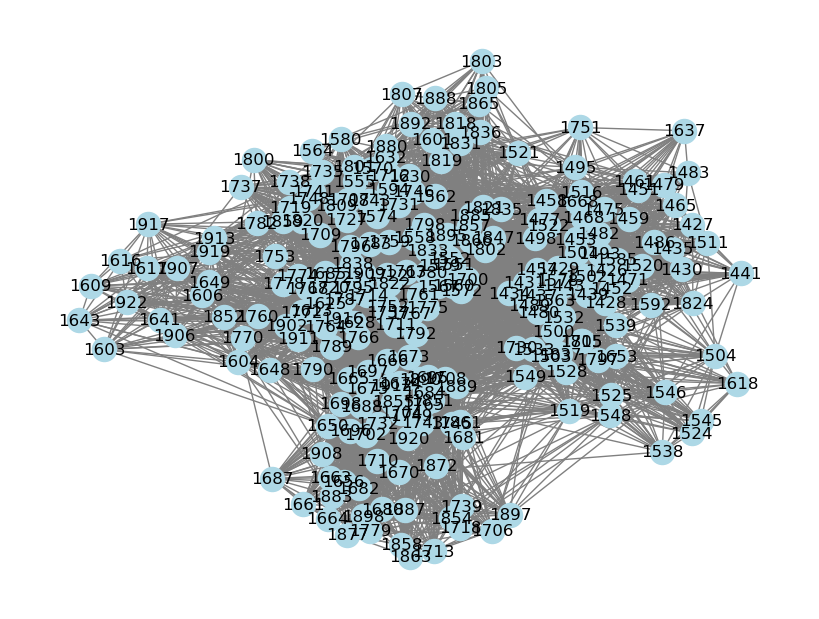

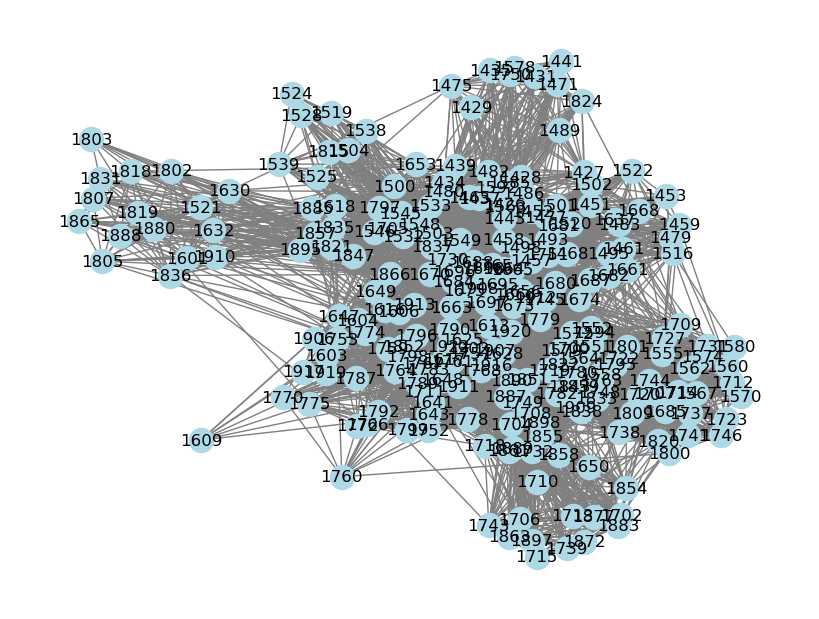

In [112]:
# Première représentation de notre graphe, première idée.

plt.figure(figsize=(8,6))
nx.draw(G01, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

plt.figure(figsize=(8,6))
nx.draw(G02, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

In [113]:
# Visualisons un peu l'allure des données 
# 
# Pour le graphe du jour 1

print("Jour 1:")
print(G01.nodes(data=True))
print(G01.edges(data=True))

# Pour le graphe du jour 2

print("Jour 2 :")
print(G02.nodes(data=True))
print(G02.edges(data=True))

Jour 1:
[('1789', {'classname': '1A', 'gender': 'M', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41}, 'size': 10.0, 'position': {'x': -105.46777, 'y': -61.034737, 'z': 0.0}}, 'label': '1789'}), ('1780', {'classname': '3A', 'gender': 'M', 'viz': {'color': {'r': 117, 'g': 131, 'b': 255}, 'size': 10.0, 'position': {'x': 37.34756, 'y': 63.289124, 'z': 0.0}}, 'label': '1780'}), ('1782', {'classname': '3A', 'gender': 'M', 'viz': {'color': {'r': 117, 'g': 131, 'b': 255}, 'size': 10.0, 'position': {'x': -228.26913, 'y': 181.72375, 'z': 0.0}}, 'label': '1782'}), ('1783', {'classname': '1A', 'gender': 'M', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41}, 'size': 10.0, 'position': {'x': -64.468575, 'y': 80.36716, 'z': 0.0}}, 'label': '1783'}), ('1787', {'classname': '1A', 'gender': 'F', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41}, 'size': 10.0, 'position': {'x': -138.05147, 'y': -21.946629, 'z': 0.0}}, 'label': '1787'}), ('1546', {'classname': '4A', 'gender': 'F', 'viz': {'color': {'r': 252, 'g': 97, 

### Graphe simple
Une seule arête entre les noeuds mais pondérée par la somme des durées des contacts entre les noeuds

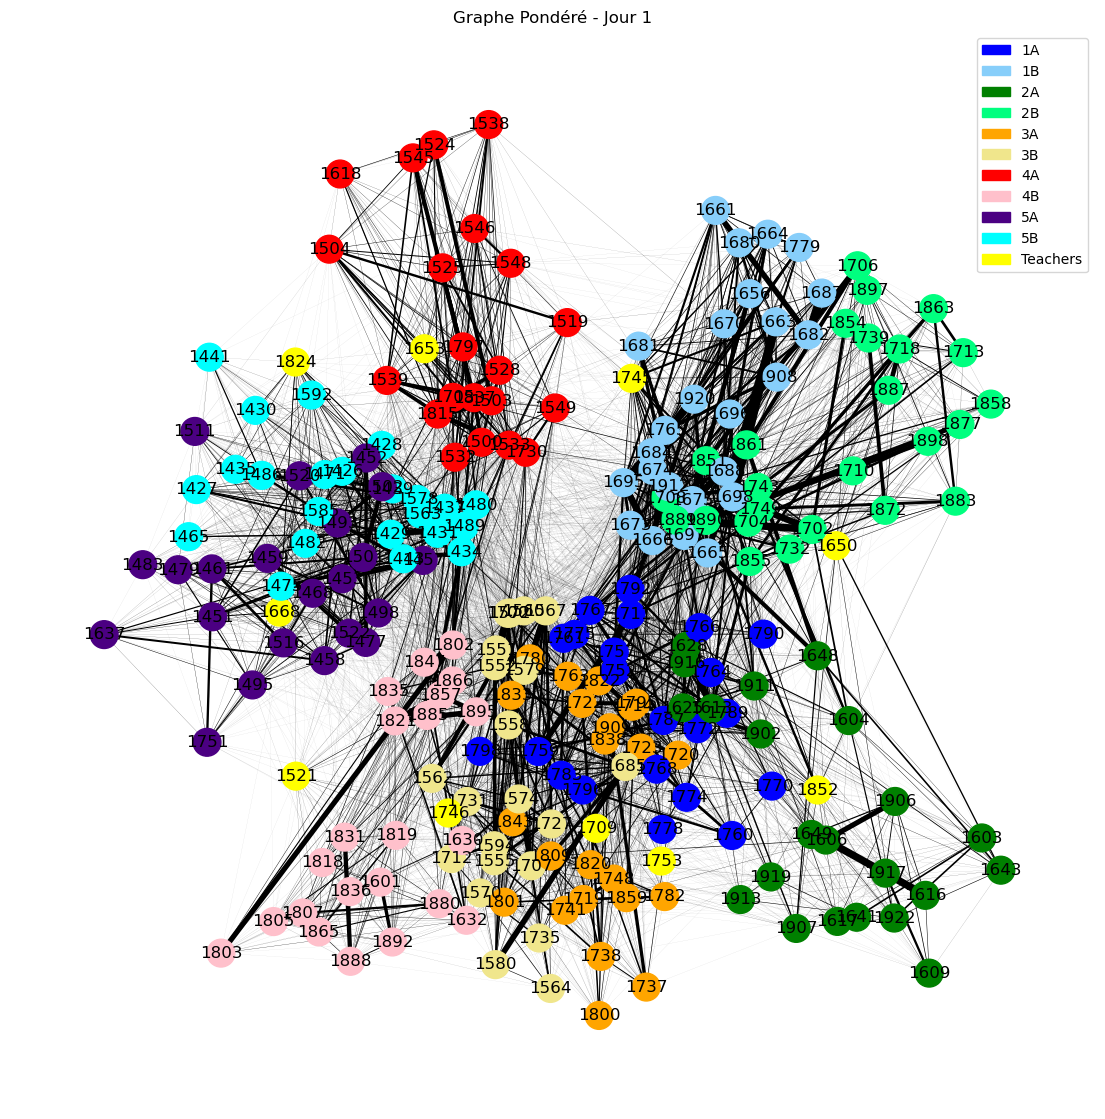

In [114]:
# Construction d’un graphe pondéré JOUR 1

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors


G1 = nx.Graph()

# --- Ajout des nœuds avec attributs ---
for n, data in G01.nodes(data=True):
    
    G1.add_node(n, classname=data.get("classname", "NA"))

# --- Ajout des arêtes pondérées ---
# Notons w la durée de chaque contact (qui sert de poids)

for u, v, data in G01.edges(data=True):

            
    w = data.get("duration", 1)
    G1.add_edge(u, v, duration=w)

# Couleurs
color_map = {
    "1A": "blue",
    "1B": "lightskyblue",
    "2A": "green",
    "2B": "springgreen",
    "3A": "orange",
    "3B": "khaki",
    "4A": "red",
    "4B": "pink",
    "5A": "indigo",
    "5B": "cyan",
    "Teachers" : "yellow"
}

node_colors = [
    color_map.get(G1.nodes[n].get("classname", "PAT"), "gray")
    for n in G1.nodes()
]

plt.figure(figsize=(14, 14))

legend_handles = [
    mpatches.Patch(color=color, label=cat)
    for cat, color in color_map.items()
]
plt.legend(handles=legend_handles)

# Largeurs proportionnelles et !!! on ne tient compte que des contacts supérieurs à 2 minutes, pour plus de lisibilité 
# (et comme proposé dans l'article)
edges = G1.edges()
if w > 120:
    edge_weights = [G1[u][v]["duration"] for u, v in edges]
    max_w = max(edge_weights)
    edge_widths = [10 * w / max_w for w in edge_weights]


nx.draw(
    G1,
    with_labels=True,
    node_color=node_colors,
    node_size=400,
    width=edge_widths
)

plt.title("Graphe Pondéré - Jour 1")
plt.show()







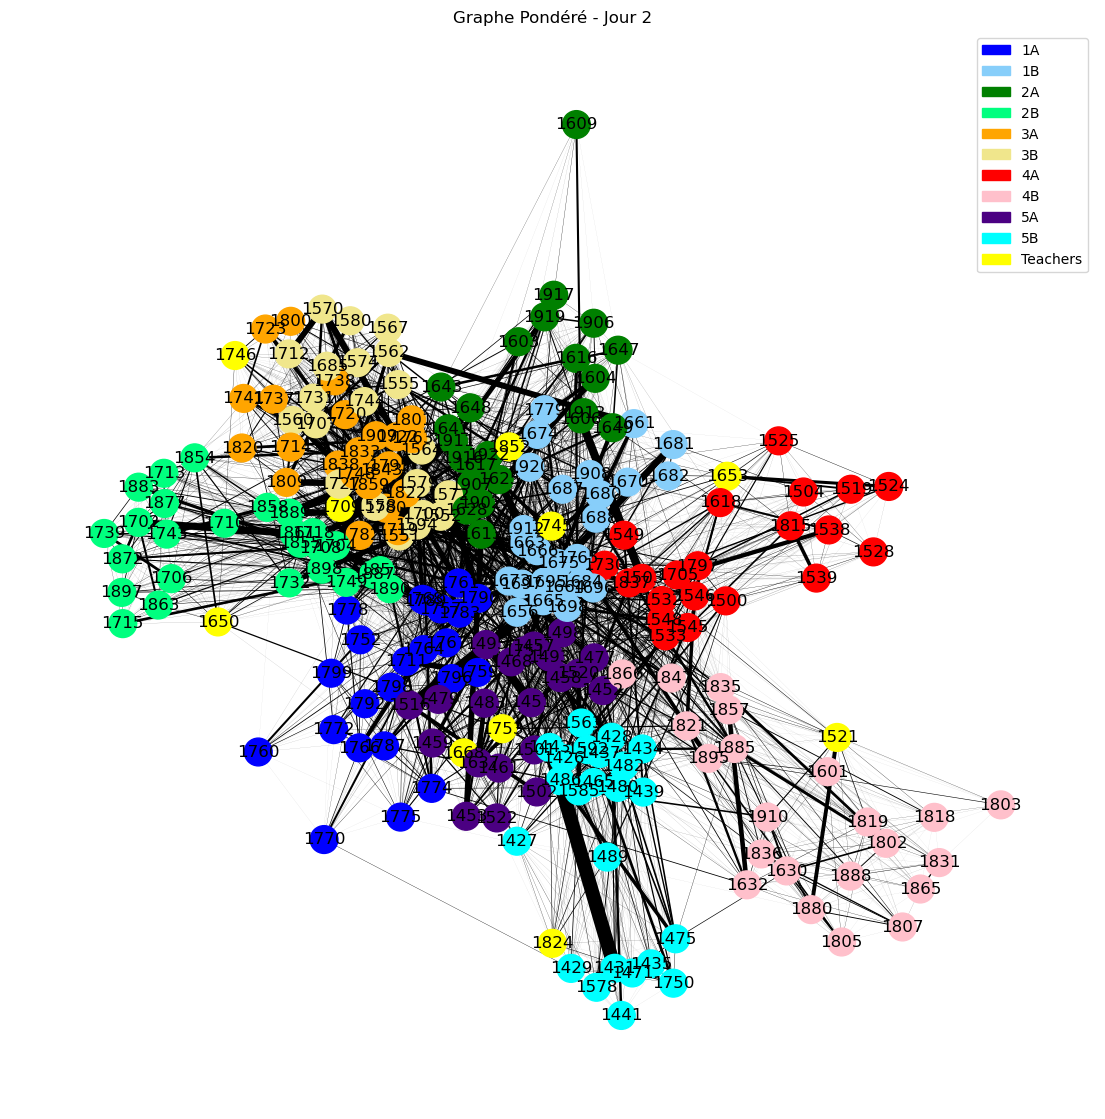

In [115]:
# Construction d’un graphe pondéré JOUR 2

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors


G2 = nx.Graph()

# --- Ajout des nœuds avec attributs ---
for n, data in G02.nodes(data=True):
    
    G2.add_node(n, classname=data.get("classname", "NA"))

# --- Ajout des arêtes pondérées ---
# Notons w la durée de chaque contact (qui sert de poids)

for u, v, data in G02.edges(data=True):
    
    w = data.get("duration", 1)
    G2.add_edge(u, v, duration=w)

# Couleurs
color_map = {
    "1A": "blue",
    "1B": "lightskyblue",
    "2A": "green",
    "2B": "springgreen",
    "3A": "orange",
    "3B": "khaki",
    "4A": "red",
    "4B": "pink",
    "5A": "indigo",
    "5B": "cyan",
    "Teachers" : "yellow"
}

node_colors = [
    color_map.get(G2.nodes[n].get("classname", "PAT"), "gray")
    for n in G2.nodes()
]

plt.figure(figsize=(14, 14))

legend_handles = [
    mpatches.Patch(color=color, label=cat)
    for cat, color in color_map.items()
]
plt.legend(handles=legend_handles)

# Largeurs proportionnelles
edges = G2.edges()
if w > 120:
    edge_weights = [G2[u][v]["duration"] for u, v in edges]
    max_w = max(edge_weights)
    edge_widths = [10 * w / max_w for w in edge_weights]


nx.draw(
    G2,
    with_labels=True,
    node_color=node_colors,
    node_size=400,
    width=edge_widths
)

plt.title("Graphe Pondéré - Jour 2")
plt.show()







In [116]:
# Diamètre du graphe

print("Diamètre du Graphe 1:" , nx.diameter(G1))
print("Diamètre du Graphe 1:" , nx.diameter(G2))

Diamètre du Graphe 1: 3
Diamètre du Graphe 1: 3


In [117]:
# Calcul du chemin le plus court entre 2 individus, en moyenne

print("Chemin le plus court entre 2 individus Jour 1:",nx.average_shortest_path_length(G1))
print("Chemin le plus court entre 2 individus Jour 2:",nx.average_shortest_path_length(G2)) 
# n'importe quel individu est connecté à n'importe quel autre via (moins de) 2 intermédiaires!

Chemin le plus court entre 2 individus Jour 1: 1.860439956725568
Chemin le plus court entre 2 individus Jour 2: 1.9405382406127007


In [119]:
# Calcul du degré moyen

print("Degré moyen Jour 1:", np.mean([deg for _, deg in G1.degree()]) )
print("Degré moyen Jour 2:", np.mean([deg for _, deg in G1.degree()]))

Degré moyen Jour 1: 49.99152542372882
Degré moyen Jour 2: 49.99152542372882


### Première propriétés basiques

#### Distribution des degrés

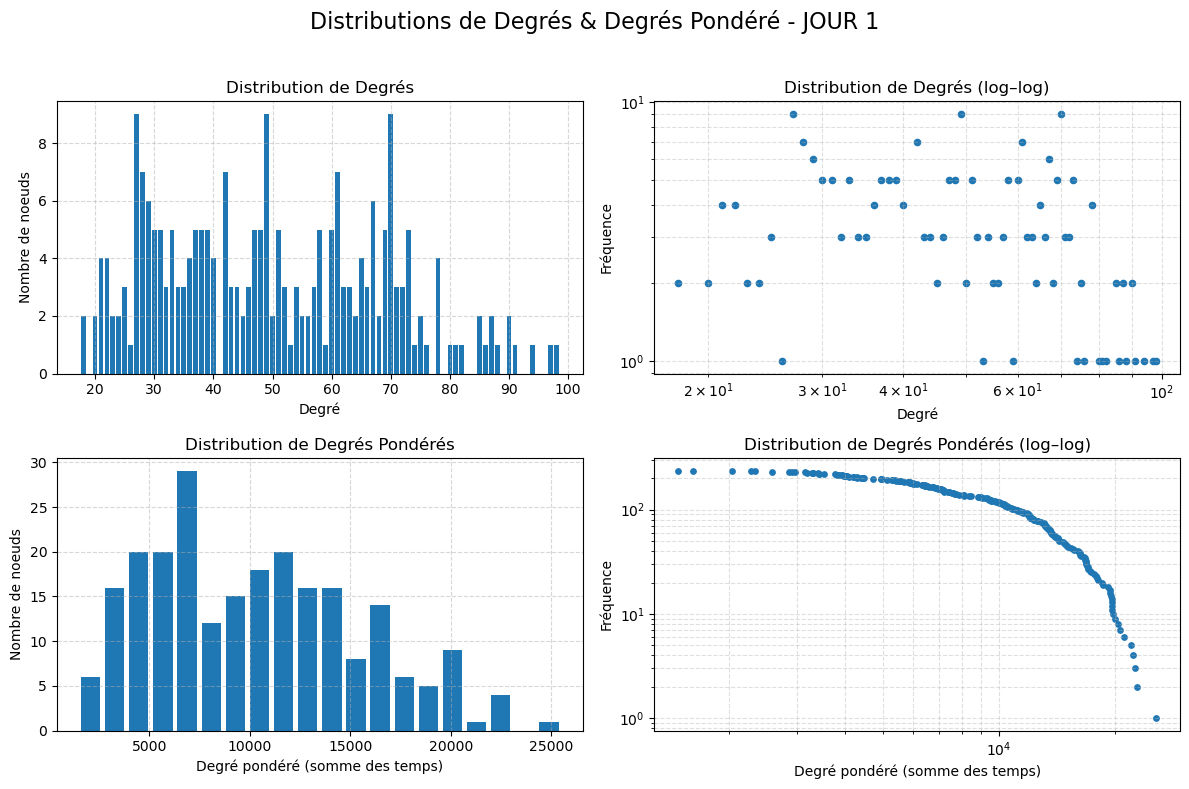

In [120]:
# Jour 1

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def plot_combined_degree_distributions(G1, savepath=None):
    """
    Produit une figure 2x2 avec :
      1. Histogramme du degré
      2. Log-log scatter (degré)
      3. Histogramme du degré pondéré
      4. Log-log rank plot du degré pondéré
    """

    # --------------------------
    # 1. DEGRÉS NON PONDÉRÉS
    # --------------------------

    degrees = [d for _, d in G1.degree()]

    # histogramme
    bins_deg = range(min(degrees), max(degrees) + 2)

    # log-log scatter
    degree_count = {}
    for d in degrees:
        degree_count[d] = degree_count.get(d, 0) + 1

    x_deg = np.array(list(degree_count.keys()))
    y_deg = np.array(list(degree_count.values()))

    # --------------------------
    # 2. DEGRÉS PONDÉRÉS (STRENGTH)
    # --------------------------

    weighted_degrees = [d for _, d in G1.degree(weight="duration")]

    # histogramme weighted
    bins_wdeg = 20

    # rank plot (log-log)
    wdeg_sorted = np.sort(weighted_degrees)[::-1]
    ranks = np.arange(1, len(wdeg_sorted) + 1)

    # --------------------------
    # FIGURE COMBINÉE
    # --------------------------

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle("Distributions de Degrés & Degrés Pondéré - JOUR 1", fontsize=16)

    # --- 1. Histogramme du degré ---
    axes[0, 0].hist(degrees, bins=bins_deg, align='left', rwidth=0.8)
    axes[0, 0].set_title("Distribution de Degrés")
    axes[0, 0].set_xlabel("Degré")
    axes[0, 0].set_ylabel("Nombre de noeuds")
    axes[0, 0].grid(True, linestyle='--', alpha=0.5)

    # --- 2. Log-log scatter (degree) ---
    axes[0, 1].scatter(x_deg, y_deg, s=20)
    axes[0, 1].set_xscale("log")
    axes[0, 1].set_yscale("log")
    axes[0, 1].set_title("Distribution de Degrés (log–log)")
    axes[0, 1].set_xlabel("Degré")
    axes[0, 1].set_ylabel("Fréquence")
    axes[0, 1].grid(True, which="both", linestyle="--", alpha=0.4)

    # --- 3. Histogramme du weighted degree ---
    axes[1, 0].hist(weighted_degrees, bins=bins_wdeg, rwidth=0.8)
    axes[1, 0].set_title("Distribution de Degrés Pondérés")
    axes[1, 0].set_xlabel("Degré pondéré (somme des temps)")
    axes[1, 0].set_ylabel("Nombre de noeuds")
    axes[1, 0].grid(True, linestyle='--', alpha=0.5)

    # --- 4. Log-log rank plot weighted degree ---
    axes[1, 1].scatter(wdeg_sorted, ranks, s=15)
    axes[1, 1].set_xscale("log")
    axes[1, 1].set_yscale("log")
    axes[1, 1].set_title("Distribution de Degrés Pondérés (log–log)")
    axes[1, 1].set_xlabel("Degré pondéré (somme des temps)")
    axes[1, 1].set_ylabel("Fréquence")
    axes[1, 1].grid(True, which='both', linestyle='--', alpha=0.4)

    plt.tight_layout(rect=[0, 0, 1, 0.96])

    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')

    plt.show()


# ---------------------------
# APPEL DE LA FONCTION
# ---------------------------

plot_combined_degree_distributions(G1, savepath="figures/hospital_degree_combined.png")


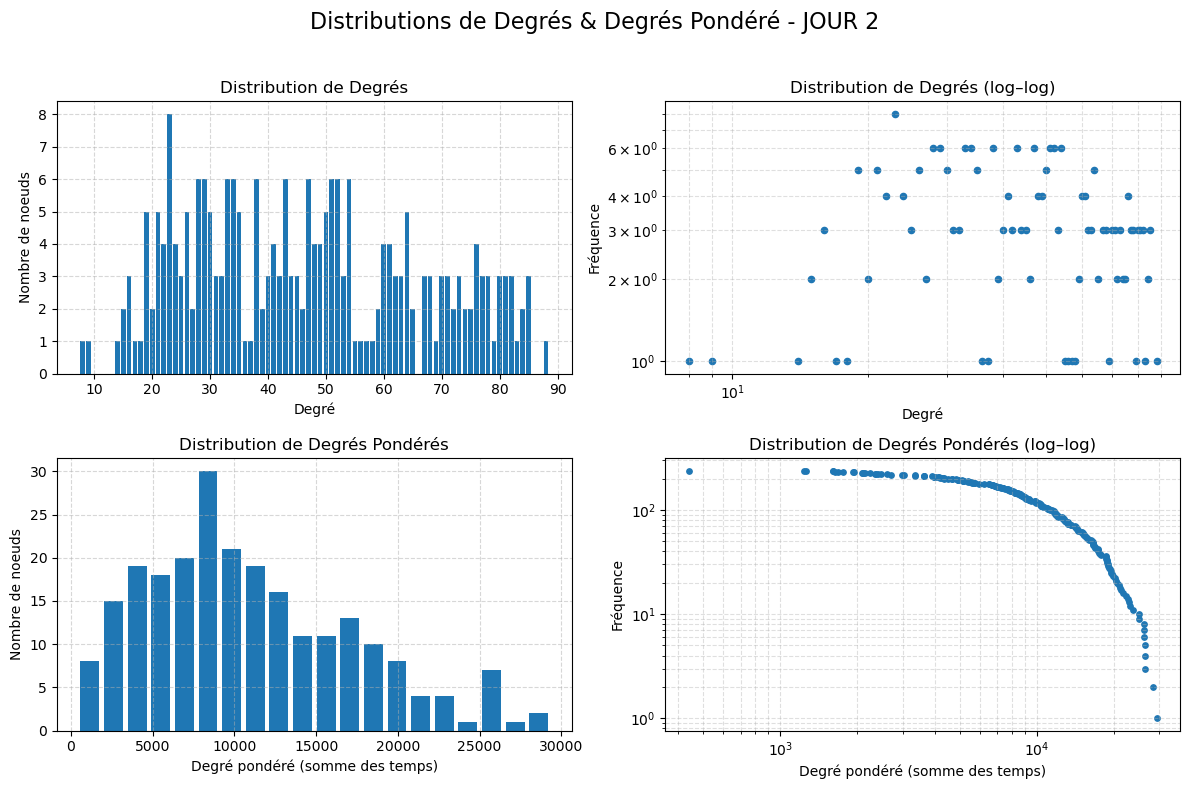

In [ ]:
# Jour 2 - Degrés 

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def plot_combined_degree_distributions(G2, savepath=None):
  
    # --------------------------
    # 1. DEGRÉS NON PONDÉRÉS
    # --------------------------

    degrees = [d for _, d in G2.degree()]

    # histogramme
    bins_deg = range(min(degrees), max(degrees) + 2)

    # log-log scatter
    degree_count = {}
    for d in degrees:
        degree_count[d] = degree_count.get(d, 0) + 1

    x_deg = np.array(list(degree_count.keys()))
    y_deg = np.array(list(degree_count.values()))

    # --------------------------
    # 2. DEGRÉS PONDÉRÉS (STRENGTH)
    # --------------------------

    weighted_degrees = [d for _, d in G2.degree(weight="duration")]

    # histogramme weighted
    bins_wdeg = 20

    # rank plot (log-log)
    wdeg_sorted = np.sort(weighted_degrees)[::-1]
    ranks = np.arange(1, len(wdeg_sorted) + 1)

    # --------------------------
    # FIGURE COMBINÉE
    # --------------------------

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle("Distributions de Degrés & Degrés Pondéré - JOUR 2", fontsize=16)

    # --- 1. Histogramme du degré ---
    axes[0, 0].hist(degrees, bins=bins_deg, align='left', rwidth=0.8)
    axes[0, 0].set_title("Distribution de Degrés")
    axes[0, 0].set_xlabel("Degré")
    axes[0, 0].set_ylabel("Nombre de noeuds")
    axes[0, 0].grid(True, linestyle='--', alpha=0.5)

    # --- 2. Log-log scatter (degree) ---
    axes[0, 1].scatter(x_deg, y_deg, s=20)
    axes[0, 1].set_xscale("log")
    axes[0, 1].set_yscale("log")
    axes[0, 1].set_title("Distribution de Degrés (log–log)")
    axes[0, 1].set_xlabel("Degré")
    axes[0, 1].set_ylabel("Fréquence")
    axes[0, 1].grid(True, which="both", linestyle="--", alpha=0.4)

    # --- 3. Histogramme du weighted degree ---
    axes[1, 0].hist(weighted_degrees, bins=bins_wdeg, rwidth=0.8)
    axes[1, 0].set_title("Distribution de Degrés Pondérés")
    axes[1, 0].set_xlabel("Degré pondéré (somme des temps)")
    axes[1, 0].set_ylabel("Nombre de noeuds")
    axes[1, 0].grid(True, linestyle='--', alpha=0.5)

    # --- 4. Log-log rank plot weighted degree ---
    axes[1, 1].scatter(wdeg_sorted, ranks, s=15)
    axes[1, 1].set_xscale("log")
    axes[1, 1].set_yscale("log")
    axes[1, 1].set_title("Distribution de Degrés Pondérés (log–log)")
    axes[1, 1].set_xlabel("Degré pondéré (somme des temps)")
    axes[1, 1].set_ylabel("Fréquence")
    axes[1, 1].grid(True, which='both', linestyle='--', alpha=0.4)

    plt.tight_layout(rect=[0, 0, 1, 0.96])

    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')

    plt.show()


# ---------------------------
# APPEL DE LA FONCTION
# ---------------------------

plot_combined_degree_distributions(G2, savepath="figures/hospital_degree_combined.png")


In [98]:
# Extraction des 10 noeuds les plus important en terme de degrés - JOUR 1
cat = nx.get_node_attributes(G1, "classname")

df_deg = pd.DataFrame({
    "node": [n for n, d in G1.degree()],
    "degree": [d for n, d in G1.degree()],
    "weighted_degree": [d for n, d in G1.degree(weight="duration")],
    "classname": [cat[n] for n in G1.nodes()],
})

# sur base de leur degré
print(df_deg.sort_values("degree", ascending=False).head(10))

# sur base de leur degré pondéré
print(df_deg.sort_values("weighted_degree", ascending=False).head(10))


     node  degree  weighted_degree classname
23   1551      98            13700        3B
211  1761      97            13560        1A
1    1780      94            13380        3A
38   1700      91            19740        3B
49   1822      90            14960        3A
40   1552      90            19160        3B
175  1890      88            22520        2B
32   1560      87            16780        3B
86   1833      87            12240        3A
45   1708      86            16540        2B
     node  degree  weighted_degree classname
17   1695      67            25480        1B
51   1698      61            22680        1B
175  1890      88            22520        2B
27   1697      76            22240        1B
58   1920      53            21940        1B
202  1889      71            21040        2B
46   1558      69            20600        3B
201  1688      58            20320        1B
56   1663      36            20000        1B
38   1700      91            19740        3B


### Corrélation de Pearson

In [100]:
from scipy.stats import pearsonr

#Coefficient de Pearson: entre le nombre de contacts d'un individu le premier et le 2è jour

# 1. Ensemble de tous les individus
individus = set(G01.nodes()) | set(G02.nodes())

# 2. Calcul du nombre de contacts (degree) pour chaque individu
contacts_j1 = []
contacts_j2 = []

for ind in individus:
    degree_j1 = G01.degree(ind) if ind in G01 else 0
    degree_j2 = G02.degree(ind) if ind in G02 else 0

    contacts_j1.append(degree_j1)
    contacts_j2.append(degree_j2)

# Convertir en tableaux
x = np.array(contacts_j1)
y = np.array(contacts_j2)

# 3. Corrélation de Pearson
correlation_coefficient, p_value = pearsonr(x, y)

#print("Nombre de contacts jour 1 :", x)
#print("Nombre de contacts jour 2 :", y)
print("Corrélation Pearson :", correlation_coefficient)
print("p-value :", p_value)
  

Corrélation Pearson : 0.536468870248612
p-value : 1.9490558411746093e-19


In [ ]:
# Corrélation de Pearson: temps de contact d'un individu le premier et le second jour

from collections import defaultdict

# 2. Durées totales par individu
duree_totale_j1 = defaultdict(int)
duree_totale_j2 = defaultdict(int)

# --- Jour 1 ---
for u, v, d in G01.edges(data=True):
    dur = d.get("duration", 0)
    duree_totale_j1[u] += dur
    duree_totale_j1[v] += dur

# --- Jour 2 ---
for u, v, d in G02.edges(data=True):
    dur = d.get("duration", 0)
    duree_totale_j2[u] += dur
    duree_totale_j2[v] += dur

# 3. Construire les vecteurs alignés
x = np.array([duree_totale_j1[ind] for ind in individus])
y = np.array([duree_totale_j2[ind] for ind in individus])

# 4. Corrélation de Pearson
correlation_coefficient, p_value = pearsonr(x, y)

#print("Durée totale jour 1 :", x)
#print("Durée totale jour 2 :", y)
print("Corrélation de Pearson :", correlation_coefficient)
print("P-value :", p_value)


Corrélation de Pearson : 0.5448387300726254
P-value : 4.137857425154623e-20


#### Coefficient de clustering

In [15]:
#  JOUR 1
# 
# clustering non pondéré moyen
avg_clust1 = nx.average_clustering(G1)
print("Average clustering (unweighted) :", avg_clust1)

# clustering pondéré moyen
avg_clust1_w = nx.average_clustering(G1, weight="duration")
print("Average clustering (weighted, weight='duration') :", avg_clust1_w)

# Local clustering coefficients (non pondéré)
clust_nodes1 = nx.clustering(G1) 


# Local clustering coefficients (pondéré)
clust_nodes1_w = nx.clustering(G1, weight="duration")

nx.set_node_attributes(G1, clust_nodes1, "clustering")
nx.set_node_attributes(G1, clust_nodes1_w, "clustering_w")

# Récupérer classname pour chaque noeud
cat1 = nx.get_node_attributes(G1, "classname")

# Construction dataframe
dfc1 = pd.DataFrame({
    "node": list(G1.nodes()),
    "classname": [cat1.get(n, "NA") for n in G1.nodes()],
    "clustering": [clust_nodes1[n] for n in G1.nodes()],
    "clustering_w": [clust_nodes1_w[n] for n in G1.nodes()]
})

# Moyennes par catégorie
by_cat1 = dfc1.groupby("classname").agg({
    "clustering": ["mean", "median", "count"],
    "clustering_w": ["mean", "median"]
})
print(by_cat1)

Average clustering (unweighted) : 0.5018529176737266
Average clustering (weighted, weight='duration') : 0.007854216893789383
          clustering                 clustering_w          
                mean    median count         mean    median
classname                                                  
1A          0.449932  0.421907    22     0.006363  0.005934
1B          0.559331  0.487245    25     0.013976  0.011815
2A          0.482786  0.455027    22     0.005752  0.005253
2B          0.551385  0.551920    25     0.008760  0.007543
3A          0.461838  0.432157    23     0.005456  0.005213
3B          0.441031  0.418039    21     0.006686  0.006878
4A          0.535217  0.471545    21     0.011352  0.008829
4B          0.465171  0.429825    22     0.005578  0.004971
5A          0.522065  0.506616    22     0.006961  0.006185
5B          0.536445  0.512545    23     0.006952  0.006585
Teachers    0.496867  0.481774    10     0.007862  0.005944


In [99]:
#  JOUR 2
# 
# clustering non pondéré moyen
avg_clust2 = nx.average_clustering(G2)
print("Average clustering (unweighted) :", avg_clust2)

# clustering pondéré moyen
avg_clust2_w = nx.average_clustering(G2, weight="duration")
print("Average clustering (weighted, weight='duration') :", avg_clust2_w)

# Local clustering coefficients (non pondéré)
clust_nodes2 = nx.clustering(G2) 


# Local clustering coefficients (pondéré)
clust_nodes2_w = nx.clustering(G2, weight="duration")

nx.set_node_attributes(G2, clust_nodes2, "clustering")
nx.set_node_attributes(G2, clust_nodes2_w, "clustering_w")

# Récupérer classname pour chaque noeud
cat2 = nx.get_node_attributes(G2, "classname")

# Construction dataframe
dfc2 = pd.DataFrame({
    "node": list(G2.nodes()),
    "classname": [cat2.get(n, "NA") for n in G2.nodes()],
    "clustering": [clust_nodes2[n] for n in G2.nodes()],
    "clustering_w": [clust_nodes2_w[n] for n in G2.nodes()]
})

# Moyennes par catégorie
by_cat2 = dfc2.groupby("classname").agg({
    "clustering": ["mean", "median", "count"],
    "clustering_w": ["mean", "median"]
})
print(by_cat2)

Average clustering (unweighted) : 0.559558532849634
Average clustering (weighted, weight='duration') : 0.010547983810277462
          clustering                 clustering_w          
                mean    median count         mean    median
classname                                                  
1A          0.496788  0.452347    23     0.006868  0.006079
1B          0.461910  0.413165    25     0.011152  0.009112
2A          0.536808  0.503017    23     0.014663  0.012103
2B          0.641347  0.593909    26     0.013039  0.011712
3A          0.559206  0.526776    23     0.009765  0.009238
3B          0.547581  0.532656    21     0.011995  0.010486
4A          0.565185  0.471264    21     0.008150  0.007421
4B          0.624955  0.650753    22     0.007096  0.006660
5A          0.522142  0.495510    21     0.011113  0.009649
5B          0.636142  0.502674    23     0.010782  0.008488
Teachers    0.560434  0.485586    10     0.011227  0.011401


### Mesures de centralité

In [ ]:
# JOUR 1
# Degree
degree_dict = dict(G1.degree())

# Betweenness
betweenness_dict = nx.betweenness_centrality(G1, normalized=True)

# Closeness
closeness_dict = nx.closeness_centrality(G1)

# Katz centrality (alpha < 1/lambda_max)
katz_dict = nx.katz_centrality_numpy(G1, alpha=0.005, beta=1.0)

# PageRank non pondéré
pagerank_dict = nx.pagerank(G1, weight=None)

# ================
# DATAFRAME COMPLET
# ================

df_cent = pd.DataFrame({
    'node': list(G1.nodes()),
    'category': [G1.nodes[n]['classname'] for n in G1.nodes()],
    'degree': [degree_dict[n] for n in G1.nodes()],
    'betweenness': [betweenness_dict[n] for n in G1.nodes()],
    'closeness': [closeness_dict[n] for n in G1.nodes()],
    'katz': [katz_dict[n] for n in G1.nodes()],
    'pagerank': [pagerank_dict[n] for n in G1.nodes()],
})

# ================
# FONCTION TOP-K
# ================

def show_topk(df, measure, k=10):
    top = df.sort_values(by=measure, ascending=False).head(k)
    print(f"\n=== Top {k} – {measure} ===")
    print(top[['node', 'category', measure]].to_string(index=False))
    return top

# Appels : affichage des tables
top_degree     = show_topk(df_cent, 'degree')
top_betweenness = show_topk(df_cent, 'betweenness')
top_closeness   = show_topk(df_cent, 'closeness')
top_katz        = show_topk(df_cent, 'katz')
top_pagerank    = show_topk(df_cent, 'pagerank')



=== Top 10 – degree ===
node category  degree
1551       3B      98
1761       1A      97
1780       3A      94
1700       3B      91
1822       3A      90
1552       3B      90
1890       2B      88
1560       3B      87
1833       3A      87
1708       2B      86

=== Top 10 – betweenness ===
node category  betweenness
1551       3B     0.014428
1890       2B     0.014355
1552       3B     0.013228
1916       2A     0.012587
1761       1A     0.012479
1911       2A     0.011655
1708       2B     0.011613
1780       3A     0.011169
1700       3B     0.010851
1613       2A     0.010350

=== Top 10 – closeness ===
node category  closeness
1551       3B   0.631720
1761       1A   0.630027
1780       3A   0.625000
1700       3B   0.620053
1822       3A   0.618421
1552       3B   0.618421
1890       2B   0.615183
1560       3B   0.613577
1833       3A   0.613577
1708       2B   0.611979

=== Top 10 – katz ===
node category     katz
1551       3B 0.081304
1761       1A 0.081229
1780       

In [81]:
# JOUR 2
# Degree
degree_dict = dict(G2.degree())

# Betweenness
betweenness_dict = nx.betweenness_centrality(G2, normalized=True)

# Closeness
closeness_dict = nx.closeness_centrality(G2)

# Katz centrality (alpha < 1/lambda_max)
katz_dict = nx.katz_centrality_numpy(G2, alpha=0.005, beta=1.0)

# PageRank non pondéré
pagerank_dict = nx.pagerank(G2, weight=None)

# ================
# DATAFRAME COMPLET
# ================

df_cent = pd.DataFrame({
    'node': list(G2.nodes()),
    'category': [G2.nodes[n]['classname'] for n in G2.nodes()],
    'degree': [degree_dict[n] for n in G2.nodes()],
    'betweenness': [betweenness_dict[n] for n in G2.nodes()],
    'closeness': [closeness_dict[n] for n in G2.nodes()],
    'katz': [katz_dict[n] for n in G2.nodes()],
    'pagerank': [pagerank_dict[n] for n in G2.nodes()],
})

# ================
# FONCTION TOP-K
# ================

def show_topk(df, measure, k=10):
    top = df.sort_values(by=measure, ascending=False).head(k)
    print(f"\n=== Top {k} – {measure} ===")
    print(top[['node', 'category', measure]].to_string(index=False))
    return top

# Appels : affichage des tables
top_degree     = show_topk(df_cent, 'degree')
top_betweenness = show_topk(df_cent, 'betweenness')
top_closeness   = show_topk(df_cent, 'closeness')
top_katz        = show_topk(df_cent, 'katz')
top_pagerank    = show_topk(df_cent, 'pagerank')



=== Top 10 – degree ===
node category  degree
1665       1B      88
1765       1B      85
1757       1A      85
1551       3B      85
1579       3B      84
1697       1B      84
1664       1B      83
1851       2B      82
1613       2A      82
1822       3A      82

=== Top 10 – betweenness ===
node category  betweenness
1866       4B     0.019631
1730       4A     0.015131
1851       2B     0.015081
1890       2B     0.015030
1790       1A     0.015021
1757       1A     0.014595
1821       4B     0.014143
1551       3B     0.013551
1887       2B     0.013238
1765       1B     0.012855

=== Top 10 – closeness ===
node category  closeness
1665       1B   0.612403
1757       1A   0.606138
1551       3B   0.604592
1664       1B   0.604592
1697       1B   0.604592
1730       4A   0.603053
1765       1B   0.601523
1673       1B   0.601523
1790       1A   0.601523
1768       1A   0.600000

=== Top 10 – katz ===
node category     katz
1665       1B 0.078872
1757       1A 0.077861
1551       

In [ ]:
# --- Centralités pondérées ---

# Jour 1
degree1 = dict(G1.degree(weight="duration"))

betw1 = nx.betweenness_centrality(G1, weight="duration", normalized=True)

# closeness → distance = 1 / poids
#  pour que "plus de contact = distance plus courte", on inverse)
G1_for_closeness = G1.copy()
for u, v, d in G1_for_closeness.edges(data=True):
    d["inv_duration"] = 1 / d["duration"]

close1 = nx.closeness_centrality(G1_for_closeness, distance="inv_duration")

pagerank1 = nx.pagerank(G1, weight="duration")

katz_centrality = nx.katz_centrality( G1,alpha=0.01, beta=1.0, max_iter=1000, tol=1.0e-6, nstart=None, normalized=True, weight=None)

df1_cent = pd.DataFrame({
    "node": list(G1.nodes()),
    "classname": [G1.nodes[n]["classname"] for n in G1.nodes()],
    "degree": [degree1[n] for n in G1.nodes()],
    "betweenness": [betw1[n] for n in G1.nodes()],
    "closeness": [close1[n] for n in G1.nodes()],
    "pagerank": [pagerank1[n] for n in G1.nodes()],
    "katz_centrality":[katz_centrality[n] for n in G1.nodes()]
})

df1_cent.head()


node classname  degree  betweenness   closeness  pagerank  katz_centrality
0  1789        1A    5900     0.005414  173.847865  0.002716         0.061141
1  1780        3A   13380     0.013200  233.535643  0.005533         0.097007
2  1782        3A    5300     0.007497  178.861499  0.002671         0.058135
3  1783        1A    8060     0.004084  197.509086  0.003468         0.063642
4  1787        1A   15980     0.017755  204.749243  0.005857         0.080840

In [18]:

# Jour 2
degree2 = dict(G2.degree(weight="duration"))

betw2 = nx.betweenness_centrality(G2, weight="duration", normalized=True)

# closeness → distance = 1 / poids
#  pour que "plus de contact = distance plus courte", on inverse)
G2_for_closeness = G2.copy()
for u, v, d in G2_for_closeness.edges(data=True):
    d["inv_duration"] = 1 / d["duration"]

close2 = nx.closeness_centrality(G2_for_closeness, distance="inv_duration")

pagerank2 = nx.pagerank(G2, weight="duration")

katz_centrality = nx.katz_centrality( G2,alpha=0.01, beta=1.0, max_iter=1000, tol=1.0e-6, nstart=None, normalized=True, weight=None)

df2_cent = pd.DataFrame({
    "node": list(G2.nodes()),
    "classname": [G2.nodes[n]["classname"] for n in G2.nodes()],
    "degree": [degree2[n] for n in G2.nodes()],
    "betweenness": [betw2[n] for n in G2.nodes()],
    "closeness": [close2[n] for n in G2.nodes()],
    "pagerank": [pagerank2[n] for n in G2.nodes()],
    "katz_centrality":[katz_centrality[n] for n in G2.nodes()]
})

df2_cent.head()

node classname  degree  betweenness   closeness  pagerank  katz_centrality
0  1789        1A    7900     0.008573  178.388960  0.003781         0.066501
1  1780        3A   17300     0.007664  214.690491  0.005789         0.087474
2  1782        3A   12840     0.004487  184.560484  0.004424         0.073898
3  1783        1A    8140     0.011938  177.887790  0.004111         0.062453
4  1787        1A    4680     0.001677  161.335204  0.002630         0.050979

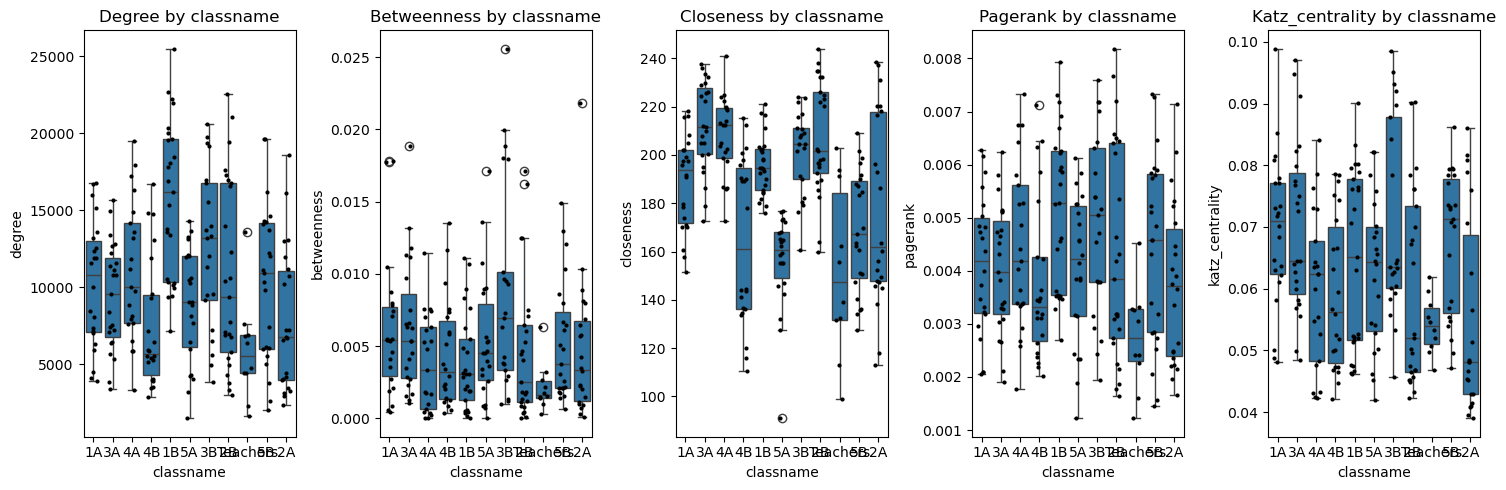

In [19]:
# JOUR 1

import seaborn as sns

centralities = ["degree", "betweenness", "closeness", "pagerank", "katz_centrality"]

plt.figure(figsize=(15, 5))
for i, c in enumerate(centralities, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df1_cent, x="classname", y=c)
    sns.stripplot(data=df1_cent, x="classname", y=c, color="black", size=3, jitter=0.2)
    plt.title(f"{c.capitalize()} by classname")
plt.tight_layout()
plt.show()

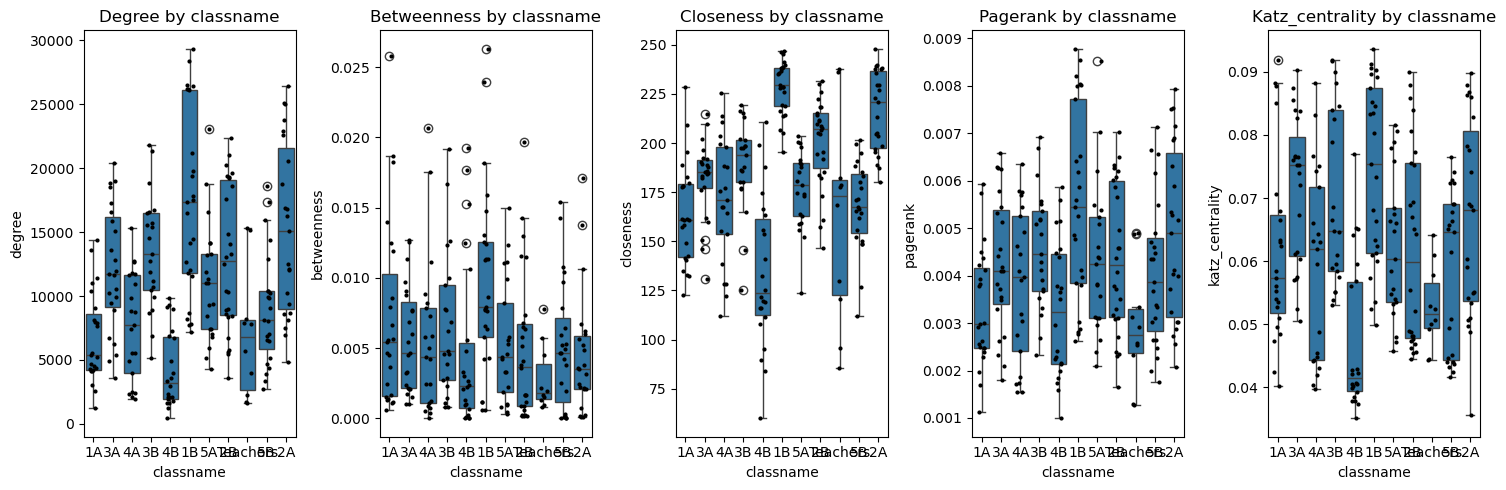

In [20]:
 # JOUR 2


centralities2 = ["degree", "betweenness", "closeness", "pagerank", "katz_centrality"]

plt.figure(figsize=(15, 5))
for i, c in enumerate(centralities2, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df2_cent, x="classname", y=c)
    sns.stripplot(data=df2_cent, x="classname", y=c, color="black", size=3, jitter=0.2)
    plt.title(f"{c.capitalize()} by classname")
plt.tight_layout()
plt.show()

#### Coefficient de corrélation de Pearson

In [77]:
#Coefficient de Pearson: entre le nombre de contacts d'un individu le premier et le 2è jour

from scipy.stats import pearsonr

# 1. Ensemble de tous les individus
individus = set(G01.nodes()) | set(G02.nodes())

# 2. Calcul du nombre de contacts (degree) pour chaque individu
contacts_j1 = []
contacts_j2 = []

for ind in individus:
    degree_j1 = G01.degree(ind) if ind in G01 else 0
    degree_j2 = G02.degree(ind) if ind in G02 else 0

    contacts_j1.append(degree_j1)
    contacts_j2.append(degree_j2)

# Convertir en tableaux
x = np.array(contacts_j1)
y = np.array(contacts_j2)

# 3. Corrélation de Pearson
correlation_coefficient, p_value = pearsonr(x, y)

#print("Nombre de contacts jour 1 :", x)
#print("Nombre de contacts jour 2 :", y)
print("Corrélation Pearson :", correlation_coefficient)
print("p-value :", p_value)
  

Corrélation Pearson : 0.536468870248612
p-value : 1.9490558411746093e-19


In [75]:
# Corrélation de Pearson entre le temps de contact d'un individu le premier et le second jour

from collections import defaultdict

# 2. Durées totales par individu
duree_totale_j1 = defaultdict(int)
duree_totale_j2 = defaultdict(int)

# --- Jour 1 ---
for u, v, d in G01.edges(data=True):
    dur = d.get("duration", 0)
    duree_totale_j1[u] += dur
    duree_totale_j1[v] += dur

# --- Jour 2 ---
for u, v, d in G02.edges(data=True):
    dur = d.get("duration", 0)
    duree_totale_j2[u] += dur
    duree_totale_j2[v] += dur

# 3. Construire les vecteurs alignés
x = np.array([duree_totale_j1[ind] for ind in individus])
y = np.array([duree_totale_j2[ind] for ind in individus])

# 4. Corrélation de Pearson
correlation_coefficient, p_value = pearsonr(x, y)

#print("Durée totale jour 1 :", x)
#print("Durée totale jour 2 :", y)
print("Corrélation de Pearson :", correlation_coefficient)
print("P-value :", p_value)


Corrélation de Pearson : 0.5448387300726254
P-value : 4.137857425154623e-20


### Modèle de réseau

In [102]:
# JOUR 1

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Données du graphe réel
# -----------------------------

N = G1.number_of_nodes()
M = G1.number_of_edges()

# Probabilité ER correspondante
p = (2*M) / (N*(N-1))

# -----------------------------
# Modèles
# -----------------------------

# 1) ER random graph
G1_er = nx.gnp_random_graph(N, p)

# 2) Configuration Model (avec préservation du degree sequence)
deg_seq = [d for _, d in G1.degree()]
G1_cm_multi = nx.configuration_model(deg_seq)   # multigraph
G1_cm = nx.Graph(G1_cm_multi)                    # conversion en graphe simple
G1_cm.remove_edges_from(nx.selfloop_edges(G1_cm))

# 3) Barabási–Albert
# Choix de m = M/N approx = degree moyen / 2
m_ba = max(1, int(np.mean(deg_seq) // 2))
G1_ba = nx.barabasi_albert_graph(N, m_ba)

# -----------------------------
# Fonction utilitaire : mesures
# -----------------------------

def summary_stats(H, name):
    print(f"\n=== {name} ===")
    print("Nodes:", H.number_of_nodes())
    print("Edges:", H.number_of_edges())
    print("Density:", nx.density(H))
    print("Average clustering:", nx.average_clustering(H))
    try:
        print("Average shortest path length:", nx.average_shortest_path_length(H))
    except:
        print("Average shortest path length: not connected")

summary_stats(G1, "Real Hospital Graph")
summary_stats(G1_er, "ER model")
summary_stats(G1_cm, "Configuration Model")
summary_stats(G1_ba, "BA model")



=== Real Hospital Graph ===
Nodes: 236
Edges: 5899
Density: 0.2127298954201226
Average clustering: 0.5018529176737266
Average shortest path length: 1.860439956725568

=== ER model ===
Nodes: 236
Edges: 5868
Density: 0.21161197259285972
Average clustering: 0.212743725421848
Average shortest path length: 1.788460151460512

=== Configuration Model ===
Nodes: 236
Edges: 5162
Density: 0.1861521817526145
Average clustering: 0.2263847032795268
Average shortest path length: 1.8180310133429498

=== BA model ===
Nodes: 236
Edges: 5088
Density: 0.18348359177785792
Average clustering: 0.2828713195264547
Average shortest path length: 1.8186080057699243


 ### Détection de communautés
 

Modularity: 0.3675
Number of communities: 5
Community sizes (id : size):
  0 : 23
  1 : 69
  2 : 69
  3 : 23
  4 : 52

Composition des communautés :
classname  1A  1B  2A  2B  3A  3B  4A  4B  5A  5B  Teachers  size
community                                                        
1           0   0  22   0  23  21   0   0   0   0         3    69
2           0   0   0   0   0   0  21   0  22  23         3    69
4           0  25   0  25   0   0   0   0   0   0         2    52
0          22   0   0   0   0   0   0   0   0   0         1    23
3           0   0   0   0   0   0   0  22   0   0         1    23


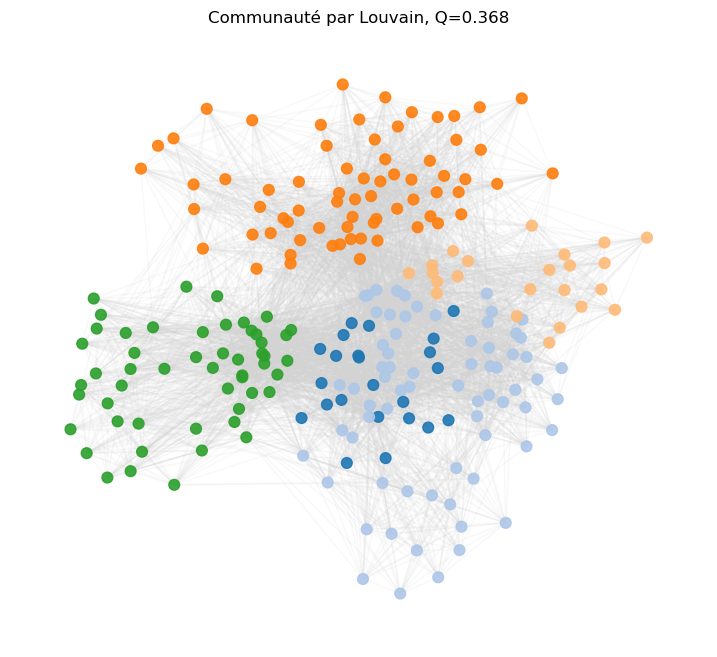

In [22]:
# JOUR 1

!pip install python-louvain

import community as community_louvain

# ---------------------------
# 1) Partition Louvain
# ---------------------------

partition1 = community_louvain.best_partition(G1)
nx.set_node_attributes(G1, partition1, "community")

# ---------------------------
# 2) Modularity & community sizes
# ---------------------------

modularity = community_louvain.modularity(partition1, G1)

from collections import Counter
comm_counts = Counter(partition1.values())
n_comms = len(comm_counts)

print(f"Modularity: {modularity:.4f}")
print(f"Number of communities: {n_comms}")
print("Community sizes (id : size):")
for cid, size in comm_counts.items():
    print(f"  {cid} : {size}")

# ---------------------------
# 3) Composition par catégorie
# ---------------------------

df_nodes = pd.DataFrame({
    "node": list(G1.nodes()),
    "classname": [G1.nodes[n]['classname'] for n in G1.nodes()],
    "community": [partition1[n] for n in G1.nodes()]
})

comp_table = pd.crosstab(df_nodes["community"], df_nodes["classname"])
comp_table["size"] = comp_table.sum(axis=1)
comp_table = comp_table.sort_values("size", ascending=False)

print("\nComposition des communautés :")
print(comp_table)

# ---------------------------
# 4) Affichage du graphe coloré par communauté
# ---------------------------

pos = nx.spring_layout(G1, seed=42)

# palette
import matplotlib.cm as cm
palette = [cm.tab20(i) for i in range(20)]
colors = [palette[partition1[n] % 20] for n in G1.nodes()]

plt.figure(figsize=(9, 8))
nx.draw_networkx_nodes(G1, pos, node_color=colors, node_size=60, alpha=0.9)
nx.draw_networkx_edges(G1, pos, edge_color="lightgray", alpha=0.15)
plt.axis("off")
plt.title(f"Communauté par Louvain, Q={modularity:.3f}")
plt.savefig('./figures/School_Day1_communities_louvain.png')
plt.show()


Modularity: 0.3963
Number of communities: 6
Community sizes (id : size):
  0 : 24
  1 : 46
  2 : 48
  3 : 23
  5 : 46
  4 : 51

Composition des communautés :
classname  1A  1B  2A  2B  3A  3B  4A  4B  5A  5B  Teachers  size
community                                                        
4           0   0  23  26   0   0   0   0   0   0         2    51
2           0  25   0   0   0   0  21   0   0   0         2    48
1           0   0   0   0  23  21   0   0   0   0         2    46
5           0   0   0   0   0   0   0   0  21  23         2    46
0          23   0   0   0   0   0   0   0   0   0         1    24
3           0   0   0   0   0   0   0  22   0   0         1    23


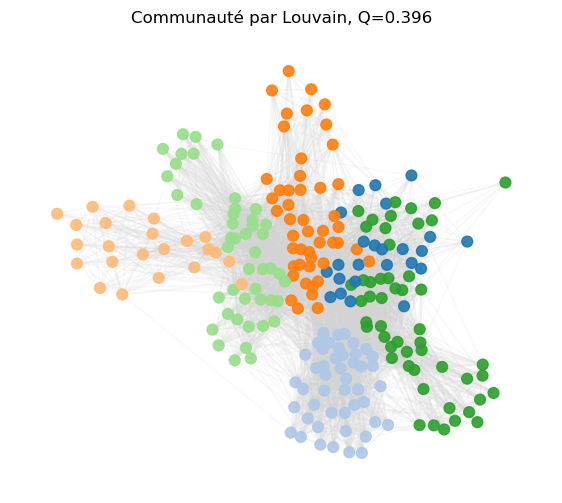

In [23]:
# JOUR 2

# ---------------------------
# 1) Partition Louvain
# ---------------------------

partition2 = community_louvain.best_partition(G2)
nx.set_node_attributes(G2, partition2, "community")

# ---------------------------
# 2) Modularity & community sizes
# ---------------------------

modularity2 = community_louvain.modularity(partition2, G2)

from collections import Counter
comm_counts = Counter(partition2.values())
n_comms = len(comm_counts)

print(f"Modularity: {modularity2:.4f}")
print(f"Number of communities: {n_comms}")
print("Community sizes (id : size):")
for cid, size in comm_counts.items():
    print(f"  {cid} : {size}")

# ---------------------------
# 3) Composition par catégorie
# ---------------------------

df_nodes = pd.DataFrame({
    "node": list(G2.nodes()),
    "classname": [G2.nodes[n]['classname'] for n in G2.nodes()],
    "community": [partition2[n] for n in G2.nodes()]
})

comp_table = pd.crosstab(df_nodes["community"], df_nodes["classname"])
comp_table["size"] = comp_table.sum(axis=1)
comp_table = comp_table.sort_values("size", ascending=False)

print("\nComposition des communautés :")
print(comp_table)

# ---------------------------
# 4) Affichage du graphe coloré par communauté
# ---------------------------

pos = nx.spring_layout(G2, seed=42)

# palette
import matplotlib.cm as cm
palette = [cm.tab20(i) for i in range(20)]
colors = [palette[partition2[n] % 20] for n in G2.nodes()]

plt.figure(figsize=(7, 6))
nx.draw_networkx_nodes(G2, pos, node_color=colors, node_size=60, alpha=0.9)
nx.draw_networkx_edges(G2, pos, edge_color="lightgray", alpha=0.15)
plt.axis("off")
plt.title(f"Communauté par Louvain, Q={modularity2:.3f}")
plt.savefig('./figures/School_Day2_communities_louvain.png')
plt.show()


# Dynamique


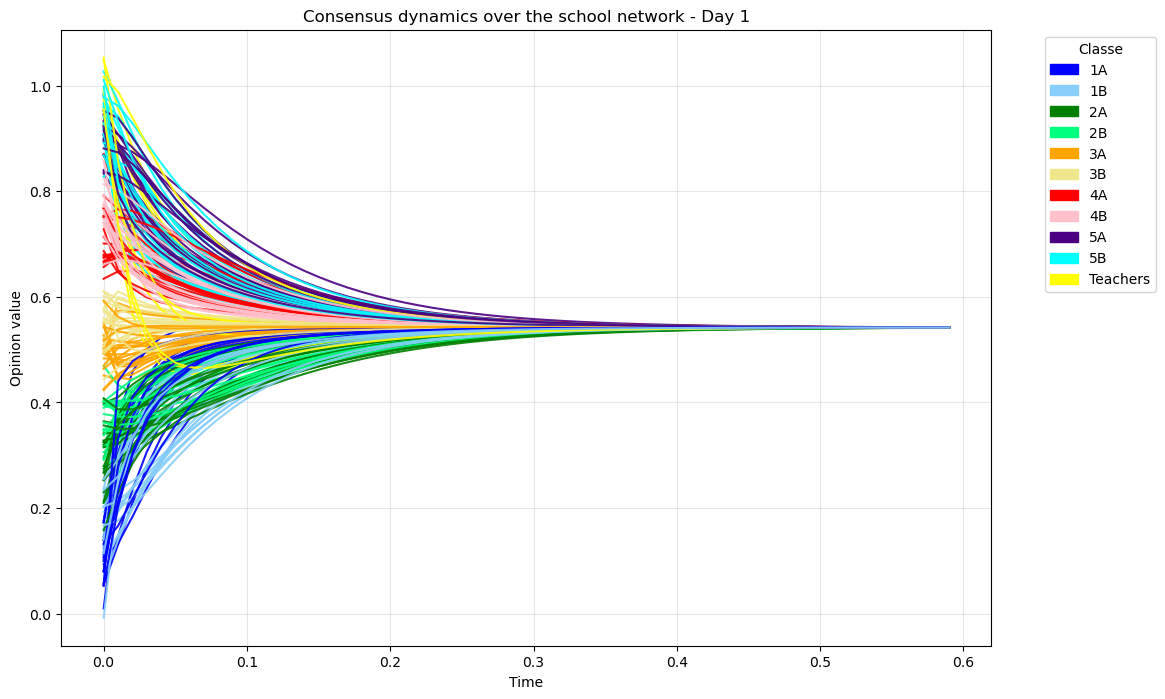

Final consensus value ≈ 0.5419487607744317


In [24]:
# JOUR 1
#*********

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ---------------------------
# 1) Laplacian dynamics  dx/dt = -Lx
# ---------------------------

# Laplacian matrix
L = nx.laplacian_matrix(G1).astype(float).todense()

# random initial conditions based on categories
# (gives a small offset per group to visualize group evolution)
cat_map = {"1A": 0.10,"1B":0.15, "2A": 0.30, "2B": 0.35, "3A": 0.50,"3B": 0.55,"4A": 0.70,"4B": 0.75,"5A": 0.90,"5B": 0.95,"Teachers": 1, }
x0 = np.array([cat_map[G1.nodes[n]["classname"]] + 0.05*np.random.randn()
               for n in G1.nodes()])

# simulation parameters
dt = 0.01
T = 0.6
times = np.arange(0, T, dt)

# store trajectories
trajectories = []

x = x0.copy()
for t in times:
    trajectories.append(x.copy())
    x = x - dt * (L @ x)

trajectories = np.array(trajectories)  # shape (time, nodes)

# ---------------------------
# 2) Plot with colors by category
# ---------------------------

# Même ordre de nœuds que dans l’historique
nodes_order = list(G1.nodes())

# mêmes couleurs que précédemment
color_map = {
    "1A": "blue",
    "1B": "lightskyblue",
    "2A": "green",
    "2B": "springgreen",
    "3A": "orange",
    "3B": "khaki",
    "4A": "red",
    "4B": "pink",
    "5A": "indigo",
    "5B": "cyan",
    "Teachers" : "yellow"
}

# Préparation des couleurs pour chaque nœud
#node_colors = [color_map.get(node_classes[n], "gray") for n in nodes_order]


plt.figure(figsize=(12,8))

for i, n in enumerate(G1.nodes()):
    plt.plot(times, trajectories[:, i],
             color=color_map[G1.nodes[n]["classname"]],
             alpha=0.9)

plt.xlabel("Time")
plt.ylabel("Opinion value")
plt.title("Consensus dynamics over the school network - Day 1")
plt.grid(alpha=0.3)

# custom legend
for cat, col in color_map.items():
    plt.plot([], [], color=col, label=cat)
plt.legend(handles=legend_handles, title="Classe", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



# consensus value
print("Final consensus value ≈", float(trajectories[-1].mean()))




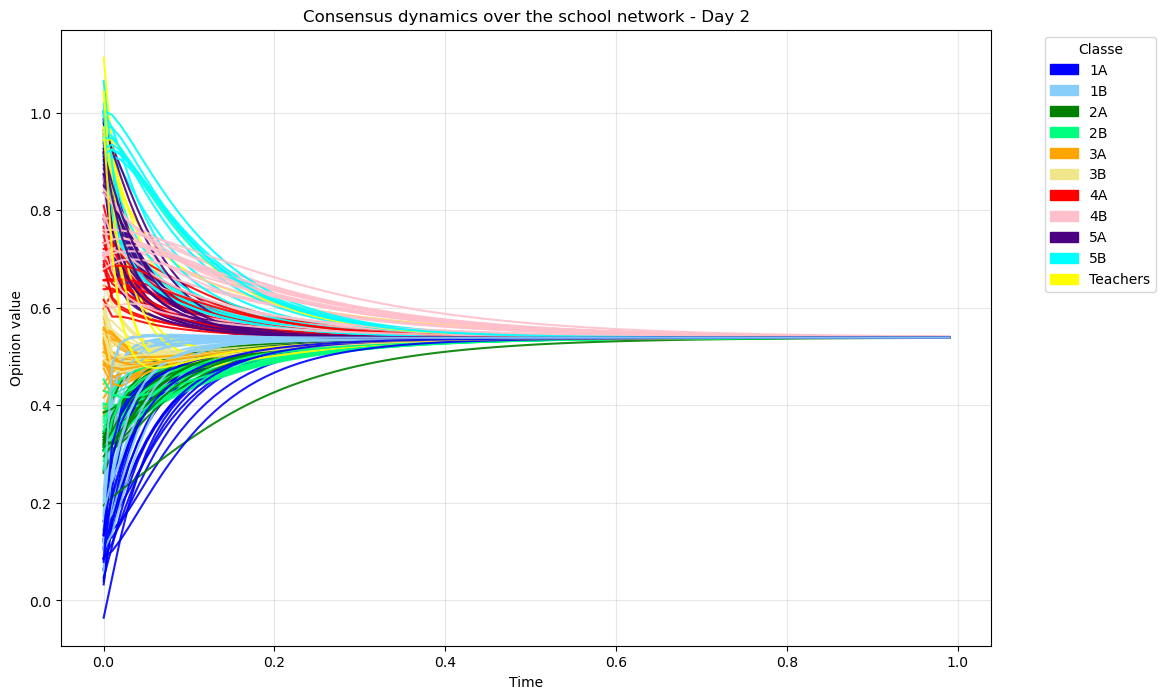

Final consensus value ≈ 0.5387305526680167


In [25]:
# JOUR 2
#*********

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ---------------------------
# 1) Laplacian dynamics  dx/dt = -Lx
# ---------------------------

# Laplacian matrix
L = nx.laplacian_matrix(G2).astype(float).todense()

# random initial conditions based on categories
# (gives a small offset per group to visualize group evolution)
cat_map = {"1A": 0.10,"1B":0.15, "2A": 0.30, "2B": 0.35, "3A": 0.50,"3B": 0.55,"4A": 0.70,"4B": 0.75,"5A": 0.90,"5B": 0.95,"Teachers": 1, }
x0 = np.array([cat_map[G2.nodes[n]["classname"]] + 0.05*np.random.randn()
               for n in G2.nodes()])

# simulation parameters
dt = 0.01
T = 1
times = np.arange(0, T, dt)

# store trajectories
trajectories = []

x = x0.copy()
for t in times:
    trajectories.append(x.copy())
    x = x - dt * (L @ x)

trajectories = np.array(trajectories)  # shape (time, nodes)

# ---------------------------
# 2) Plot with colors by category
# ---------------------------

# Même ordre de nœuds que dans l’historique
nodes_order = list(G2.nodes())

# mêmes couleurs que précédemment
color_map = {
    "1A": "blue",
    "1B": "lightskyblue",
    "2A": "green",
    "2B": "springgreen",
    "3A": "orange",
    "3B": "khaki",
    "4A": "red",
    "4B": "pink",
    "5A": "indigo",
    "5B": "cyan",
    "Teachers" : "yellow"
}

# Préparation des couleurs pour chaque nœud
#node_colors = [color_map.get(node_classes[n], "gray") for n in nodes_order]


plt.figure(figsize=(12,8))

for i, n in enumerate(G2.nodes()):
    plt.plot(times, trajectories[:, i],
             color=color_map[G2.nodes[n]["classname"]],
             alpha=0.9)

plt.xlabel("Time")
plt.ylabel("Opinion value")
plt.title("Consensus dynamics over the school network - Day 2")
plt.grid(alpha=0.3)

# custom legend
for cat, col in color_map.items():
    plt.plot([], [], color=col, label=cat)
plt.legend(handles=legend_handles, title="Classe", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



# consensus value
print("Final consensus value ≈", float(trajectories[-1].mean()))




# Random Walk - 
Je laisse pour le moment toutes mes recherches ci-dessous... mais vais les retirer si pas utiles (encore en réflexion!)

In [85]:
# --- Transition matrix T (unweighted) ---
A = nx.to_numpy_array(G1)
deg = A.sum(axis=1)
deg[deg == 0] = 1
T = A / deg[:, None]   # row-stochastic

# --- Power method ---
p = np.ones(G1.number_of_nodes()) / G1.number_of_nodes()
for _ in range(200):
    p = p @ T

# --- Build dataframe ---
df_rw = pd.DataFrame({
    "node": list(G1.nodes()),
    "classname": [G1.nodes[n]["classname"] for n in G1.nodes()],
    "stationary": p
})

df_rw = df_rw.sort_values("stationary", ascending=False)

print(df_rw.head(10))

     node classname  stationary
23   1551        3B    0.008306
211  1761        1A    0.008222
1    1780        3A    0.007967
38   1700        3B    0.007713
49   1822        3A    0.007628
40   1552        3B    0.007628
175  1890        2B    0.007459
32   1560        3B    0.007374
86   1833        3A    0.007374
45   1708        2B    0.007289


### Mean First passage

Sources sélectionnées : {'1A': '1789', '1B': '1779', '2A': '1922', '2B': '1702', '3A': '1780', '3B': '1551', '4A': '1546', '4B': '1836', '5A': '1468', '5B': '1482', 'Teachers': '1668'}
Simulation MFPT en cours...

MFPT moyen par catégorie source → catégorie cible :

target_cat          1A          1B          2A          2B          3A  \
src_cat                                                                  
1A          224.958354  274.909047  357.874787  314.402764  235.192685   
1B          234.620475  255.427544  363.491359  302.799021  231.510880   
2A          236.263099  270.237904  342.736513  311.435007  226.853420   
2B          227.807500  268.586483  357.960739  308.020250  229.047761   
3A          236.066044  278.316117  373.274266  316.984691  226.138515   
3B          234.106463  266.803297  351.231504  316.128693  235.229810   
4A          233.453360  281.125373  368.551707  313.171051  235.981614   
4B          229.679108  273.995620  367.231063  315.823430  229.214

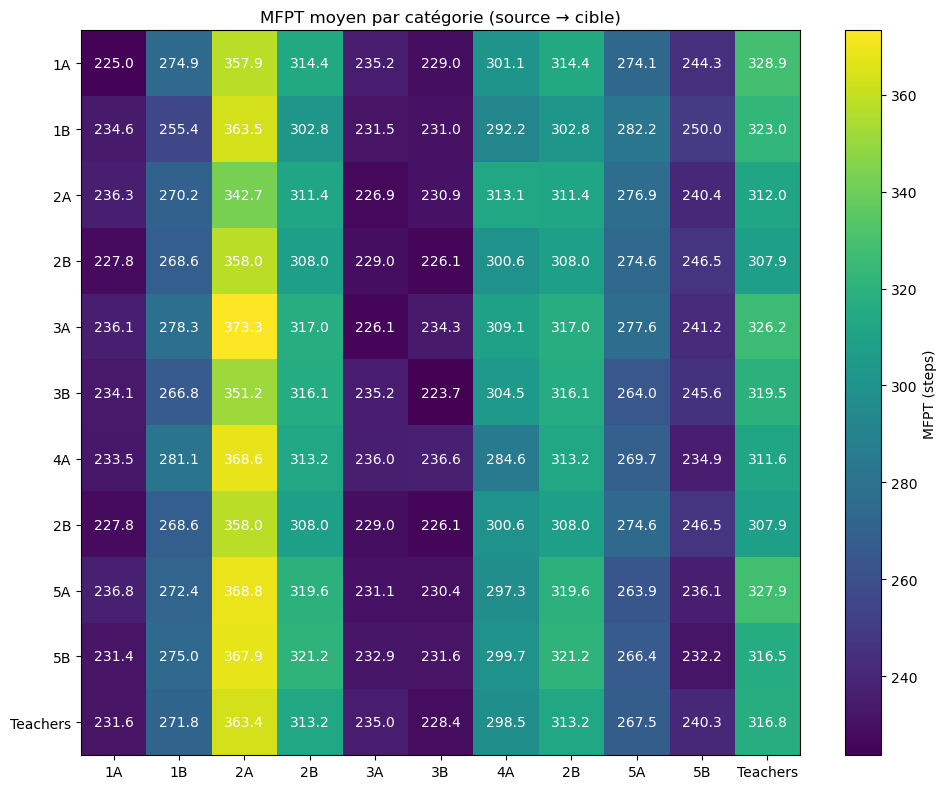

In [90]:
import random

random.seed(42)
np.random.seed(42)

# ------------------------------------------------------
# MFPT simulation sur graphe simple non pondéré
# ------------------------------------------------------
def simulate_MFPT(G1, source, target, n_sim=200, max_steps=2000):
    """Simule n_sim RW jusqu'à atteindre target, renvoie MFPT moyen."""
    steps = []
    neighbors_dict = {n: list(G1.neighbors(n)) for n in G1.nodes()}
    
    for _ in range(n_sim):
        current = source
        for t in range(1, max_steps + 1):
            neigh = neighbors_dict[current]
            if not neigh:
                break
            current = random.choice(neigh)
            if current == target:
                steps.append(t)
                break

    return float(np.mean(steps)) if len(steps) > 0 else np.nan


# ------------------------------------------------------
# Sélection d’un nœud représentatif par catégorie
# ------------------------------------------------------
sample_sources = {
    "1A": next(n for n in G1.nodes() if G1.nodes[n]["classname"] == "1A"),
    "1B": next(n for n in G1.nodes() if G1.nodes[n]["classname"] == "1B"),
    "2A": next(n for n in G1.nodes() if G1.nodes[n]["classname"] == "2A"),
    "2B": next(n for n in G1.nodes() if G1.nodes[n]["classname"] == "2B"),
    "3A": next(n for n in G1.nodes() if G1.nodes[n]["classname"] == "3A"),
    "3B": next(n for n in G1.nodes() if G1.nodes[n]["classname"] == "3B"),
    "4A": next(n for n in G1.nodes() if G1.nodes[n]["classname"] == "4A"),
    "4B": next(n for n in G1.nodes() if G1.nodes[n]["classname"] == "4B"),
    "5A": next(n for n in G1.nodes() if G1.nodes[n]["classname"] == "5A"),
    "5B": next(n for n in G1.nodes() if G1.nodes[n]["classname"] == "5B"),
    "Teachers": next(n for n in G1.nodes() if G1.nodes[n]["classname"] == "Teachers")

}

print("Sources sélectionnées :", sample_sources)

targets = list(G1.nodes())
n_sim = 200

rows = []

print("Simulation MFPT en cours...")

for src_label, src in sample_sources.items():
    for t in targets:
        mfpt = simulate_MFPT(G1, src, t, n_sim=n_sim)
        rows.append((src_label, src, t, G1.nodes[t]["classname"], mfpt))

mfpt_df = pd.DataFrame(rows, columns=["src_cat", "src_id", "target", "target_cat", "MFPT"])

# ------------------------------------------------------
# Agrégation par category → category
# ------------------------------------------------------
pivot_mean = mfpt_df.pivot_table(
    index="src_cat", columns="target_cat", values="MFPT", aggfunc="mean"
)

print("\nMFPT moyen par catégorie source → catégorie cible :\n")
print(pivot_mean)


# ------------------------------------------------------
# Heatmap 
# ------------------------------------------------------
cats = ["1A", "1B", "2A", "2B","3A", "3B", "4A", "2B","5A", "5B", "Teachers"]
heatmap_data = pivot_mean.loc[cats, cats].values

plt.figure(figsize=(10,8))
plt.imshow(heatmap_data, cmap="viridis", aspect="auto")
plt.colorbar(label="MFPT (steps)")

plt.xticks(range(len(cats)), cats)
plt.yticks(range(len(cats)), cats)
plt.title("MFPT moyen par catégorie (source → cible)")

# Ajout des valeurs sur la heatmap
for i in range(len(cats)):
    for j in range(len(cats)):
        val = heatmap_data[i, j]
        if not np.isnan(val):
            plt.text(j, i, f"{val:.1f}", ha="center", va="center", color="white")

plt.tight_layout()
plt.savefig("./figures/hospital_mfp_heatmap.png", dpi=300)
plt.show()

# Stabilité de Markov

In [ ]:
# JOUR 1

# 1. Commençons par définir une matrice de transition

def markov_transition_matrix(G1, weight="duration"):
    A1 = nx.to_numpy_array(G1, weight=weight)
    row_sums = A1.sum(axis=1)
    P = A1 / row_sums[:, None]
    return P

# 2. Puissance matricielle 
def compute_M_t(P, t):
    return np.linalg.matrix_power(P, t)

# 3. Partition -> matrice H 
def partition_matrix(partition1, nodes):
    communities = list(set(partition1.values()))
    k = len(communities)
    H = np.zeros((len(nodes), k))
    for i, node in enumerate(nodes):
        comm_id = partition1[node]
        H[i, communities.index(comm_id)] = 1
    return H

#  4. Stabilité de Markov 
def markov_stability(P_t, H, pi):
    Pi = np.diag(pi)
    R_t = H.T @ (Pi @ P_t - np.outer(pi, pi)) @ H
    return np.trace(R_t)

# 5. Fonction principale 
def compute_markov_stability(G1, times):
    # 1. Transition Markovienne
    P = markov_transition_matrix(G1, weight="duration")

    # 2. Distribution stationnaire
    degrees = np.array([d for _, d in G1.degree(weight="duration")], dtype=float)
    pi = degrees / degrees.sum()

    nodes = sorted(G1.nodes())

    # partition Louvain unique 
    partition1 = community_louvain.best_partition(G1, weight="duration")

    # matrice H
    H = partition_matrix(partition1, nodes)

    results = []  

    for t in times:
        P_t = compute_M_t(P, t)
        r_t = markov_stability(P_t, H, pi)
        results.append((t, r_t))

    return results, partition1


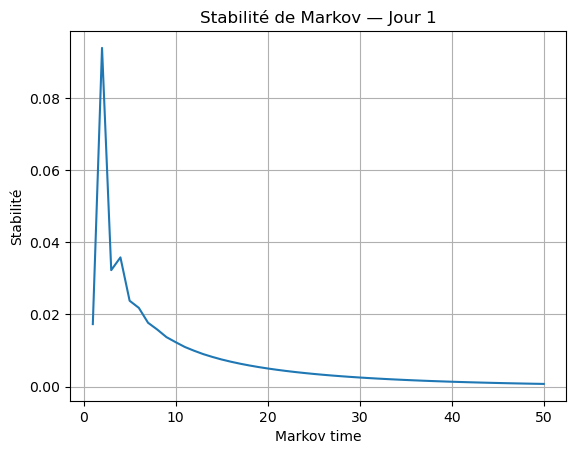

In [ ]:
times = range(1, 51)
results, partition1 = compute_markov_stability(G1, times)

times = [r[0] for r in results]
stabilities = [r[1] for r in results]

plt.plot(times, stabilities)
plt.xlabel("Markov time")
plt.ylabel("Stabilité")
plt.title("Stabilité de Markov — Jour 1")
plt.grid(True)
plt.show()


In [96]:
# JOUR 2 - Stabilité de Markov

# 1. Commençons par définir une matrice de transition

def markov_transition_matrix(G2, weight="duration"):
    A2 = nx.to_numpy_array(G2, weight=weight)
    row_sums = A2.sum(axis=1)
    P = A2 / row_sums[:, None]
    return P

# 2. Puissance matricielle 
def compute_M_t(P, t):
    return np.linalg.matrix_power(P, t)

# 3. Partition -> matrice H 
def partition_matrix(partition2, nodes):
    communities = list(set(partition2.values()))
    k = len(communities)
    H = np.zeros((len(nodes), k))
    for i, node in enumerate(nodes):
        comm_id = partition2[node]
        H[i, communities.index(comm_id)] = 1
    return H

#  4. Stabilité de Markov 
def markov_stability(P_t, H, pi):
    Pi = np.diag(pi)
    R_t = H.T @ (Pi @ P_t - np.outer(pi, pi)) @ H
    return np.trace(R_t)

# 5. Fonction principale 
def compute_markov_stability(G2, times):
    # 1. Transition Markovienne
    P = markov_transition_matrix(G2, weight="duration")

    # 2. Distribution stationnaire
    degrees = np.array([d for _, d in G2.degree(weight="duration")], dtype=float)
    pi = degrees / degrees.sum()

    nodes = sorted(G2.nodes())

    # partition Louvain unique 
    partition2 = community_louvain.best_partition(G2, weight="duration")

    # matrice H
    H = partition_matrix(partition2, nodes)

    results = []  

    for t in times:
        P_t = compute_M_t(P, t)
        r_t = markov_stability(P_t, H, pi)
        results.append((t, r_t))

    return results, partition2


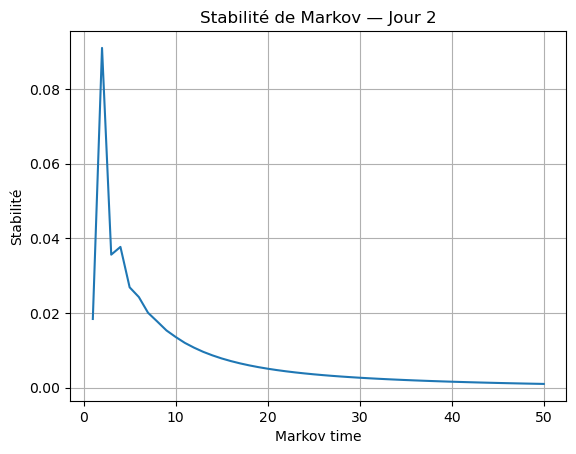

In [97]:
times = range(1, 51)
results, partition2 = compute_markov_stability(G2, times)

times = [r[0] for r in results]
stabilities = [r[1] for r in results]

plt.plot(times, stabilities)
plt.xlabel("Markov time")
plt.ylabel("Stabilité")
plt.title("Stabilité de Markov — Jour 2")
plt.grid(True)
plt.show()


Infomap

In [ ]:
!pip install igraph

import igraph as ig
import pandas as pd

# ---------------------------------------------------------
# 1. Convertir graphe NetworkX -> igraph
# ---------------------------------------------------------
nodes = list(G1.nodes())
mapping = {n: i for i, n in enumerate(nodes)}
edges = [(mapping[u], mapping[v]) for u, v in G1.edges()]

g = ig.Graph()
g.add_vertices(len(nodes))
g.add_edges(edges)

# Attributs
classnames = [G1.nodes[n]["classname"] for n in nodes]
g.vs["classname"] = classnames

# ---------------------------------------------------------
# 2. Infomap via igraph
# ---------------------------------------------------------
infomap_result = g.community_infomap()
communities = infomap_result.membership

# ---------------------------------------------------------
# 3. DataFrame résultat
# ---------------------------------------------------------
df_infomap = pd.DataFrame({
    "node": nodes,
    "community": communities,
    "classname": classnames
})

print(df_infomap["community"].value_counts().sort_index())

print("\nComposition par catégorie :")
print(pd.crosstab(df_infomap["community"], df_infomap["classname"]))



   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.2 MB 4.2 MB/s eta 0:00:01
   ------------------- -------------------- 1.6/3.2 MB 5.6 MB/s eta 0:00:01
   ----------------------------------- ---- 2.9/3.2 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 3.2/3.2 MB 5.4 MB/s eta 0:00:00
community
0    23
1    46
2    69
3    23
4    52
5    23
Name: count, dtype: int64

Composition par catégorie :
classname  1A  1B  2A  2B  3A  3B  4A  4B  5A  5B  Teachers
community                                                  
0          22   0   0   0   0   0   0   0   0   0         1
1           0   0   0   0  23  21   0   0   0   0         2
2           0   0   0   0   0   0  21   0  22  23         3
3           0   0   0   0   0   0   0  22   0   0         1
4           0  25   0  25   0   0   0   0   0   0         2
5           0   0  22   0   0   0   0   0   0   0         1


Walktrap

In [105]:
#Jour 1

import igraph as ig
# ---------------------------------------------------------
# 1. Conversion NetworkX -> igraph
# ---------------------------------------------------------
mapping = {n: i for i, n in enumerate(G1.nodes())}
edges = [(mapping[u], mapping[v]) for u, v in G1.edges()]

g = ig.Graph()
g.add_vertices(len(mapping))
g.add_edges(edges)

categories = [G1.nodes[n]["classname"] for n in G1.nodes()]
g.vs["classname"] = categories

# ---------------------------------------------------------
# 2. Walktrap (steps = 4)
# ---------------------------------------------------------
walktrap = g.community_walktrap(steps=4)
walktrap_result = walktrap.as_clustering()

memberships = walktrap_result.membership

df_walktrap = pd.DataFrame({
    "node": list(G1.nodes()),
    "community": memberships,
    "classname": categories
})

print("Taille des communautés Walktrap :")
print(df_walktrap["community"].value_counts().sort_index())

print("\nComposition par catégorie :")
print(pd.crosstab(df_walktrap["community"], df_walktrap["classname"]))


Taille des communautés Walktrap :
community
0    115
1     69
2     52
Name: count, dtype: int64

Composition par catégorie :
classname  1A  1B  2A  2B  3A  3B  4A  4B  5A  5B  Teachers
community                                                  
0          22   0  22   0  23  21   0  22   0   0         5
1           0   0   0   0   0   0  21   0  22  23         3
2           0  25   0  25   0   0   0   0   0   0         2


In [ ]:
#Jour 2


# ---------------------------------------------------------
# 1. Conversion NetworkX -> igraph
# ---------------------------------------------------------
mapping = {n: i for i, n in enumerate(G2.nodes())}
edges = [(mapping[u], mapping[v]) for u, v in G2.edges()]

g = ig.Graph()
g.add_vertices(len(mapping))
g.add_edges(edges)

categories = [G2.nodes[n]["classname"] for n in G2.nodes()]
g.vs["classname"] = categories

# ---------------------------------------------------------
# 2. Walktrap (steps = 4)
# ---------------------------------------------------------
walktrap = g.community_walktrap(steps=4)
walktrap_result = walktrap.as_clustering()

memberships = walktrap_result.membership

df_walktrap = pd.DataFrame({
    "node": list(G2.nodes()),
    "community": memberships,
    "classname": categories
})

print("Taille des communautés Walktrap :")
print(df_walktrap["community"].value_counts().sort_index())

print("\nComposition par catégorie :")
print(pd.crosstab(df_walktrap["community"], df_walktrap["classname"]))


Taille des communautés Walktrap :
community
0    48
1    46
2    90
3    16
4    27
5    11
Name: count, dtype: int64

Composition par catégorie :
classname  1A  1B  2A  2B  3A  3B  4A  4B  5A  5B  Teachers
community                                                  
0          23   0  23   0   0   0   0   0   0   0         2
1           0   0   0   0  23  21   0   0   0   0         2
2           0  25   0   0   0   0  21   7  21  13         3
3           0   0   0   0   0   0   0  15   0   0         1
4           0   0   0  26   0   0   0   0   0   0         1
5           0   0   0   0   0   0   0   0   0  10         1


Core-Periphery

In [48]:
# ------------------------------------------------------
# Core number de chaque nœud - JOUR 1
# ------------------------------------------------------
core_num = nx.core_number(G1)

df_core = pd.DataFrame({
    "node": list(G1.nodes()),
    "core": [core_num[n] for n in G1.nodes()],
    "classname": [G1.nodes[n]["classname"] for n in G1.nodes()]
})

print(df_core.sort_values("core", ascending=False).head(15))

# ------------------------------------------------------
# Distribution des core-numbers
# ------------------------------------------------------
print("\nDistribution du core number :")
print(df_core["core"].value_counts().sort_index())

# ------------------------------------------------------
# Composition par catégorie
# ------------------------------------------------------
print("\nComposition par catégorie selon core-number :")
print(pd.crosstab(df_core["core"], df_core["classname"]))


     node  core classname
235  1765    34        1B
187  1443    34        5B
151  1684    34        1B
86   1833    34        3A
153  1625    34        2A
84   1749    34        2B
155  1628    34        2A
156  1457    34        5A
80   1522    34        5A
159  1452    34        5A
78   1520    34        5A
160  1453    34        5A
75   1857    34        4B
74   1855    34        2B
167  1743    34        2B

Distribution du core number :
core
18      3
19      2
20      3
21      6
22      4
23      3
24      3
25     11
26     35
27      4
28      3
29      3
30      9
31      7
33     36
34    104
Name: count, dtype: int64

Composition par catégorie selon core-number :
classname  1A  1B  2A  2B  3A  3B  4A  4B  5A  5B  Teachers
core                                                       
18          0   0   3   0   0   0   0   0   0   0         0
19          0   0   2   0   0   0   0   0   0   0         0
20          0   0   2   0   0   0   0   0   1   0         0
21          0  

In [ ]:
# ------------------------------------------------------
# Core number de chaque nœud - JOUR 2
# ------------------------------------------------------
core_num = nx.core_number(G2)

df_core = pd.DataFrame({
    "node": list(G2.nodes()),
    "core": [core_num[n] for n in G2.nodes()],
    "classname": [G2.nodes[n]["classname"] for n in G2.nodes()]
})

print(df_core.sort_values("core", ascending=False).head(15))

# ------------------------------------------------------
# Distribution des core-numbers
# ------------------------------------------------------
print("\nDistribution du core number :")
print(df_core["core"].value_counts().sort_index())

# ------------------------------------------------------
# Composition par catégorie
# ------------------------------------------------------
print("\nComposition par catégorie selon core-number :")
print(pd.crosstab(df_core["core"], df_core["classname"]))


     node  core classname
119  1902    33        2A
109  1730    33        4A
146  1592    33        5B
143  1465    33        5B
142  1861    33        2B
141  1434    33        5B
140  1613    33        2A
139  1572    33        3B
137  1767    33        1A
135  1501    33        5A
133  1503    33        4A
131  1585    33        5B
127  1428    33        5B
1    1780    33        3A
118  1907    33        2A

Distribution du core number :
core
8       1
9       1
14      3
15     12
16      3
17      1
18      6
19      2
20      7
22      2
23     16
24      3
25      1
26     10
27     12
28     10
29      9
30     32
32      5
33    102
Name: count, dtype: int64

Composition par catégorie selon core-number :
classname  1A  1B  2A  2B  3A  3B  4A  4B  5A  5B  Teachers
core                                                       
8           0   0   1   0   0   0   0   0   0   0         0
9           0   0   0   0   0   0   0   1   0   0         0
14          0   0   0   0   0   0  

# Processus épidémique

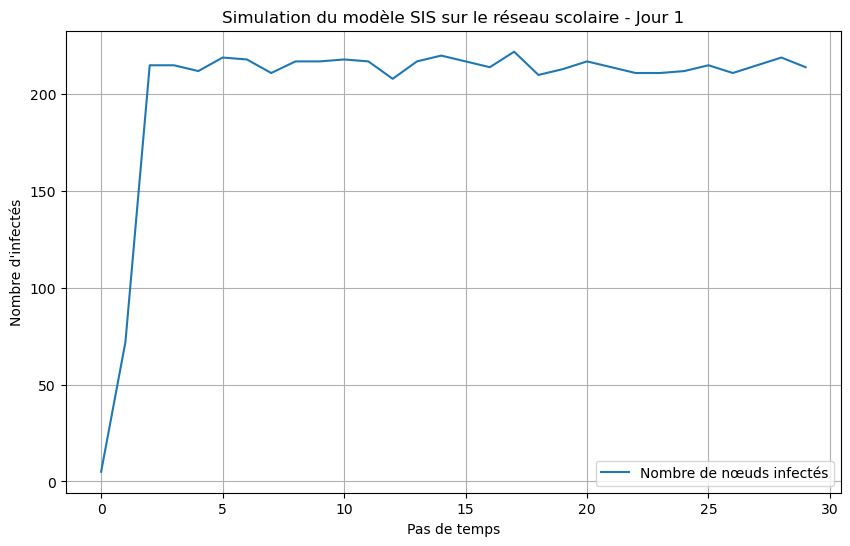

In [53]:
# Processus SIS - jour 1 - Au départ: choix de 5 personnes infectées choisies au hasard dans le réseau

import random
# Processus épidémique
N = G1.number_of_nodes()
# --- 2. Paramètres du modèle SIS ---
beta = 0.3  # Taux d'infection (Susceptible -> Infecté)
mu = 0.1  # Taux de guérison (Infecté -> Susceptible)
T = 30  # Durée de la simulation (pas de temps)

#--- 3. Initialisation de l'état (S=0, I=1) ---
state = {node: 0 for node in G1.nodes()}
# Choisir 5 nœuds infectés initiaux aléatoires parmi les indices valides de G1
initial_infected = random.sample(list(G1.nodes()), 5) 
# Assigner l'état infecté (1) à ces nœuds
for node_index in initial_infected:
    state[node_index] = 1
# Historique du nombre d'infectés au fil du temps
infected_counts = [len(initial_infected)]

# --- 4. Simulation temporelle (approche individu-centrée) ---
for t in range(1, T):
    new_state = state.copy()
    for node in G1.nodes:
        if state[node] == 0: # Si le nœud est Susceptible
            # Compter les voisins infectés
            infected_neighbors = [neighbor for neighbor in G1.neighbors(node) if state[neighbor] == 1]
            if infected_neighbors:
                # Probabilité d'infection basée sur le taux beta et le nombre de voisins infectés
                prob_infection = 1 - (1 - beta)**len(infected_neighbors)
                if random.random() < prob_infection:
                    new_state[node] = 1
        elif state[node] == 1: # Si le nœud est Infecté
            # Probabilité de guérison (retour à Susceptible)
            if random.random() < mu:
                new_state[node] = 0
    state = new_state
    # Compter le nombre d'infectés (ceux dont la valeur est 1)
    current_infected_count = sum(state.values())
    infected_counts.append(current_infected_count)

# --- 5. Visualisation des résultats ---
plt.figure(figsize=(10, 6))
plt.plot(infected_counts, label='Nombre de nœuds infectés')
plt.xlabel('Pas de temps')
plt.ylabel("Nombre d'infectés")
plt.title("Simulation du modèle SIS sur le réseau scolaire - Jour 1")
plt.legend()
plt.grid(True)
plt.show()


Core (k=34) : 104 nœuds
Périphérie (k=18) : 3 nœuds


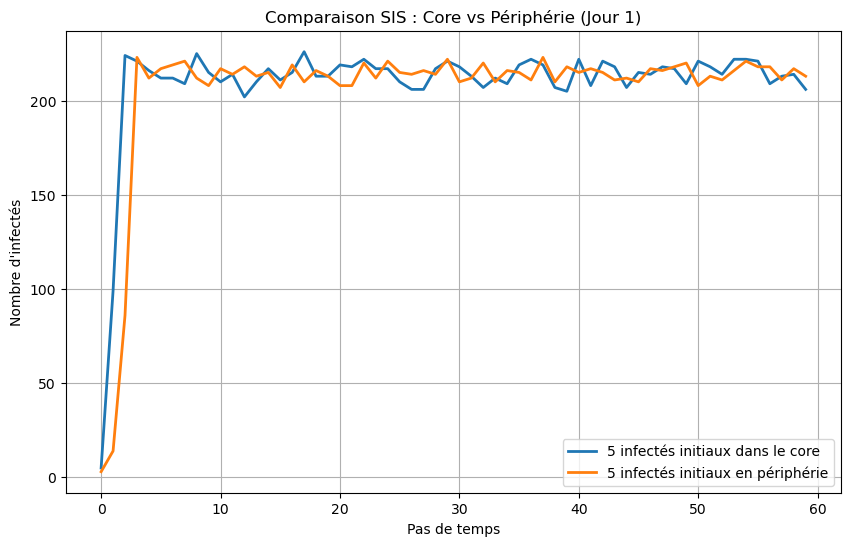

In [66]:
# Processus SIS - jour 1 - Au départ: choix de 5 personnes infectées dans le core et 
# comparaison avec un choix de 5 personnes infectées choisies dans la périphérie.

import random
import matplotlib.pyplot as plt

# ------------------------------------------------------
# Définition du core et de la périphérie
# ------------------------------------------------------
max_core = df_core["core"].max()
min_core = df_core["core"].min()

core_nodes = df_core[df_core["core"] == max_core]["node"].tolist()
periphery_nodes = df_core[df_core["core"] == min_core]["node"].tolist()

print(f"Core (k={max_core}) : {len(core_nodes)} nœuds")
print(f"Périphérie (k={min_core}) : {len(periphery_nodes)} nœuds")

# ------------------------------------------------------
# Sélection des nœuds initiaux 
# ------------------------------------------------------
n_init = 5

n_core = min(n_init, len(core_nodes))
n_periphery = min(n_init, len(periphery_nodes))

initial_core = random.sample(core_nodes, n_core)
initial_periphery = random.sample(periphery_nodes, n_periphery)

# ------------------------------------------------------
# Paramètres du modèle SIS
# ------------------------------------------------------
beta = 0.3
mu = 0.1
T = 30

# ------------------------------------------------------
# Fonction de simulation SIS
# ------------------------------------------------------
def run_SIS_simulation(G, initial_nodes):
    state = {node: 0 for node in G.nodes()}
    for node in initial_nodes:
        state[node] = 1

    infected_counts = [len(initial_nodes)]

    for t in range(1, T):
        new_state = state.copy()
        for node in G.nodes:
            if state[node] == 0:  # Susceptible
                infected_neighbors = [
                    neighbor for neighbor in G.neighbors(node)
                    if state[neighbor] == 1
                ]
                if infected_neighbors:
                    prob_infection = 1 - (1 - beta) ** len(infected_neighbors)
                    if random.random() < prob_infection:
                        new_state[node] = 1

            else:  # Infecté
                if random.random() < mu:
                    new_state[node] = 0

        state = new_state
        infected_counts.append(sum(state.values()))

    return infected_counts

# ------------------------------------------------------
# Lancement des simulations
# ------------------------------------------------------
infected_core = run_SIS_simulation(G1, initial_core)
infected_periphery = run_SIS_simulation(G1, initial_periphery)

# ------------------------------------------------------
# Visualisation comparative
# ------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(infected_core, label='5 infectés initiaux dans le core', linewidth=2)
plt.plot(infected_periphery, label='5 infectés initiaux en périphérie', linewidth=2)

plt.xlabel('Pas de temps')
plt.ylabel("Nombre d'infectés")
plt.title("Comparaison SIS : Core vs Périphérie (Jour 1)")
plt.legend()
plt.grid(True)
plt.show()


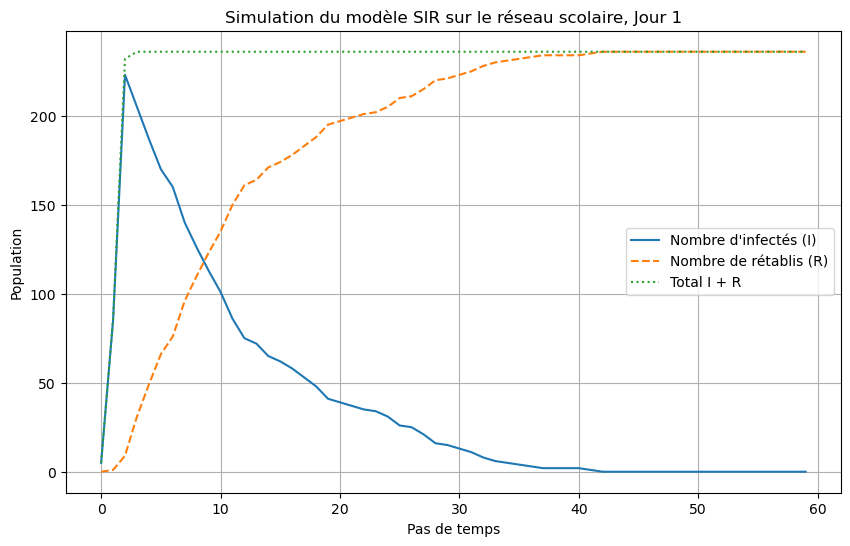

In [64]:
# Processus SIR Jour 1


import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random


N = G1.number_of_nodes()

# --- 2. Paramètres du modèle SIR ---
beta = 0.3  # Taux d'infection (S -> I)
mu = 0.1 # Taux de rétablissement (I -> R)
T = 60    # Durée de la simulation (pas de temps)

# --- 3. Initialisation de l'état (S=0, I=1, R=2) avec un Dictionnaire ---
state = {node: 0 for node in G1.nodes()}

initial_infected_nodes = random.sample(list(G1.nodes()), 5) 

for node_index in initial_infected_nodes:
    state[node_index] = 1 # Initialement infectés

# Historique du nombre d'infectés et de rétablis
infected_counts = [sum(1 for s in state.values() if s == 1)]
recovered_counts = [sum(1 for s in state.values() if s == 2)]

# --- 4. Simulation temporelle (approche individu-centrée) ---
for t in range(1, T):
    new_state = state.copy()
    for node in G1.nodes:
        if state[node] == 0: # Si le nœud est Susceptible (S)
            infected_neighbors_count = sum(1 for neighbor in G1.neighbors(node) if state[neighbor] == 1)
            
            if infected_neighbors_count > 0:
                prob_infection = 1 - (1 - beta)**infected_neighbors_count
                if random.random() < prob_infection:
                    new_state[node] = 1 # Passe de S à I
        
        elif state[node] == 1: # Si le nœud est Infecté (I)
            if random.random() < mu:
                new_state[node] = 2 # Passe de I à R (Rétabli/Immunisé)
                
        # Si state[node] == 2 (Rétabli), il ne se passe rien (immunité permanente)
                
    state = new_state
    
    infected_counts.append(sum(1 for s in state.values() if s == 1))
    recovered_counts.append(sum(1 for s in state.values() if s == 2))

# --- 5. Visualisation des résultats ---
plt.figure(figsize=(10, 6))
plt.plot(infected_counts, label="Nombre d'infectés (I)")
plt.plot(recovered_counts, label='Nombre de rétablis (R)', linestyle='--')
plt.plot(np.array(infected_counts) + np.array(recovered_counts), label="Total I + R", linestyle=':')
plt.xlabel('Pas de temps')
plt.ylabel('Population')
plt.title("Simulation du modèle SIR sur le réseau scolaire, Jour 1")
plt.legend()
plt.grid(True)
plt.show()



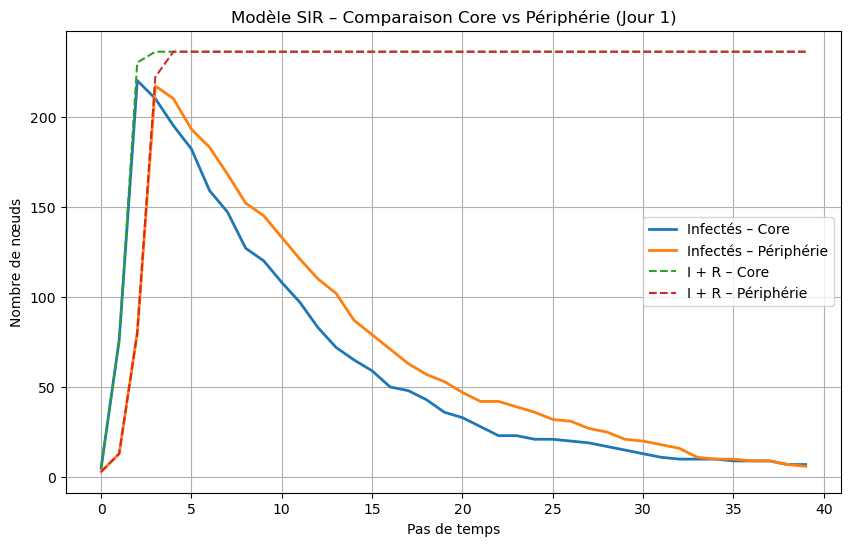

In [60]:
# Processus SIR  = = Jour 1 = = Au départ: choix de 5 personnes infectées dans le core et 
# comparaison avec un choix de 5 personnes infectées choisies dans la périphérie.

import numpy as np
import matplotlib.pyplot as plt
import random

# ------------------------------------------------------
# Sélection des nœuds initiaux
# ------------------------------------------------------
n_init = 5

n_core = min(n_init, len(core_nodes))
n_periphery = min(n_init, len(periphery_nodes))

initial_core = random.sample(core_nodes, n_core)
initial_periphery = random.sample(periphery_nodes, n_periphery)

# ------------------------------------------------------
# Paramètres du modèle SIR
# ------------------------------------------------------
beta = 0.3  # Taux d'infection (S → I)
mu = 0.1    # Taux de rétablissement (I → R)
T = 40      # Durée de la simulation

# ------------------------------------------------------
# Fonction de simulation SIR
# ------------------------------------------------------
def run_SIR_simulation(G, initial_nodes):
    # États : S=0, I=1, R=2
    state = {node: 0 for node in G.nodes()}
    for node in initial_nodes:
        state[node] = 1

    infected_counts = [len(initial_nodes)]
    recovered_counts = [0]

    for t in range(1, T):
        new_state = state.copy()

        for node in G.nodes():
            if state[node] == 0:  # Susceptible
                infected_neighbors = sum(
                    1 for neighbor in G.neighbors(node)
                    if state[neighbor] == 1
                )

                if infected_neighbors > 0:
                    prob_infection = 1 - (1 - beta) ** infected_neighbors
                    if random.random() < prob_infection:
                        new_state[node] = 1

            elif state[node] == 1:  # Infecté
                if random.random() < mu:
                    new_state[node] = 2

            # state == 2 (R) → rien à faire

        state = new_state
        infected_counts.append(sum(1 for s in state.values() if s == 1))
        recovered_counts.append(sum(1 for s in state.values() if s == 2))

    return infected_counts, recovered_counts

# ------------------------------------------------------
# Lancement des simulations
# ------------------------------------------------------
infected_core, recovered_core = run_SIR_simulation(G1, initial_core)
infected_periphery, recovered_periphery = run_SIR_simulation(G1, initial_periphery)

# ------------------------------------------------------
# Visualisation comparative
# ------------------------------------------------------
plt.figure(figsize=(10, 6))

plt.plot(infected_core, label="Infectés – Core", linewidth=2)
plt.plot(infected_periphery, label="Infectés – Périphérie", linewidth=2)

plt.plot(np.array(infected_core) + np.array(recovered_core),
         label="I + R – Core", linestyle="--")

plt.plot(np.array(infected_periphery) + np.array(recovered_periphery),
         label="I + R – Périphérie", linestyle="--")

plt.xlabel("Pas de temps")
plt.ylabel("Nombre de nœuds")
plt.title("Modèle SIR – Comparaison Core vs Périphérie (Jour 1)")
plt.legend()
plt.grid(True)
plt.show()
